# Posthoc Analysis of IMAGEN:
The preliminary results in our IMAGEN paper advocates for a more in-depth understanding of what contributes to the significant performance of the ML models for the three time-points: <br>
<li>Baseline (<b>BL</b>): Age <tr> <b>14</b></li>
<li>Follow 1 year (<b>FU1</b>): Age <b>16</b></li>
<li>Follow 2 year (<b>FU2</b>): Age <b>19</b></li>
<li>Follow 3 year (<b>FU3</b>): Age <b>22</b></li>

<br>
Such in-depth understanding can be achieved by performing follow-up analysis:

1. Summary statistics
2. Sensitivity analysis
3. Error analysis
4. Visualization SHAP

In [1]:
from imagen_instrumentloader import *
from imagen_plot_statistics import *

# 3. Error Analysis

## 3.1. Data preprocessing

<b> Load the dataset </b>

In [2]:
#################################################################################
# Validation RUN
RUN = pd.read_csv('newlbls-fu3-espad-fu3-19a-binge-n650_val_run.csv')
# Test RUN
RUN2 = pd.read_csv('newlbls-fu3-espad-fu3-19a-binge-n650_test_run.csv')
# Psychological profile
NEO = IMAGEN_instrument()
b_NEO = NEO.read_instrument('newlbls-fu3-espad-fu3-19a-binge-n650_NEO.csv')
SURPS = IMAGEN_instrument()
b_SURPS = SURPS.read_instrument('newlbls-fu3-espad-fu3-19a-binge-n650_SURPS.csv')
# Social profile
CTQ = IMAGEN_instrument()
b_CTQ = CTQ.read_instrument('newlbls-fu3-espad-fu3-19a-binge-n650_CTQ.csv')
LEQ = IMAGEN_instrument()
b_LEQ = LEQ.read_instrument('newlbls-fu3-espad-fu3-19a-binge-n650_LEQ.csv')
CTS = IMAGEN_instrument()
b_CTS = CTS.read_instrument('newlbls-fu3-espad-fu3-19a-binge-n650_CTS.csv')

<b> Generate the posthoc dataset </b>

In [3]:
# Validation
ph_NEO = pd.merge(b_NEO, RUN, on=['ID','Sex','Site','Class'], how = 'outer')
ph_SURPS = pd.merge(b_SURPS, RUN, on=['ID','Sex','Site','Class'], how = 'outer')
ph_CTQ = pd.merge(b_CTQ, RUN, on=['ID','Sex','Site','Class'], how = 'outer')
ph_LEQ = pd.merge(b_LEQ, RUN, on=['ID','Sex','Site','Class'], how = 'outer')
ph_CTS = pd.merge(b_CTS, RUN, on=['ID','Sex','Site','Class'], how = 'outer')
# Test
tt_NEO = pd.merge(b_NEO, RUN2, on=['ID','Sex','Site','Class'], how = 'outer')
tt_SURPS = pd.merge(b_SURPS, RUN2, on=['ID','Sex','Site','Class'], how = 'outer')
tt_CTQ = pd.merge(b_CTQ, RUN2, on=['ID','Sex','Site','Class'], how = 'outer')
tt_LEQ = pd.merge(b_LEQ, RUN2, on=['ID','Sex','Site','Class'], how = 'outer')
tt_CTS = pd.merge(b_CTS, RUN2, on=['ID','Sex','Site','Class'], how = 'outer')

## 3.2. Diagnosis: posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650

### 3.2.1. NEO

<b> Select the session (FU3)) </b>

In [4]:
ses_data = b_NEO
# groupby Session, code refactoring needed
ses = ses_data.groupby('Session')
b_FU3 = ses.get_group('FU3')
roi = b_FU3.columns[:5]
b_NEO = b_FU3
c_NEO = [roi[2], roi[4], roi[1], roi[3], roi[0]]

<b> Plot the result by Sex & Class </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=3.768e-03 stat=-2.907e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.844e-05 stat=4.216e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.385e-07 stat=-5.326e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with 

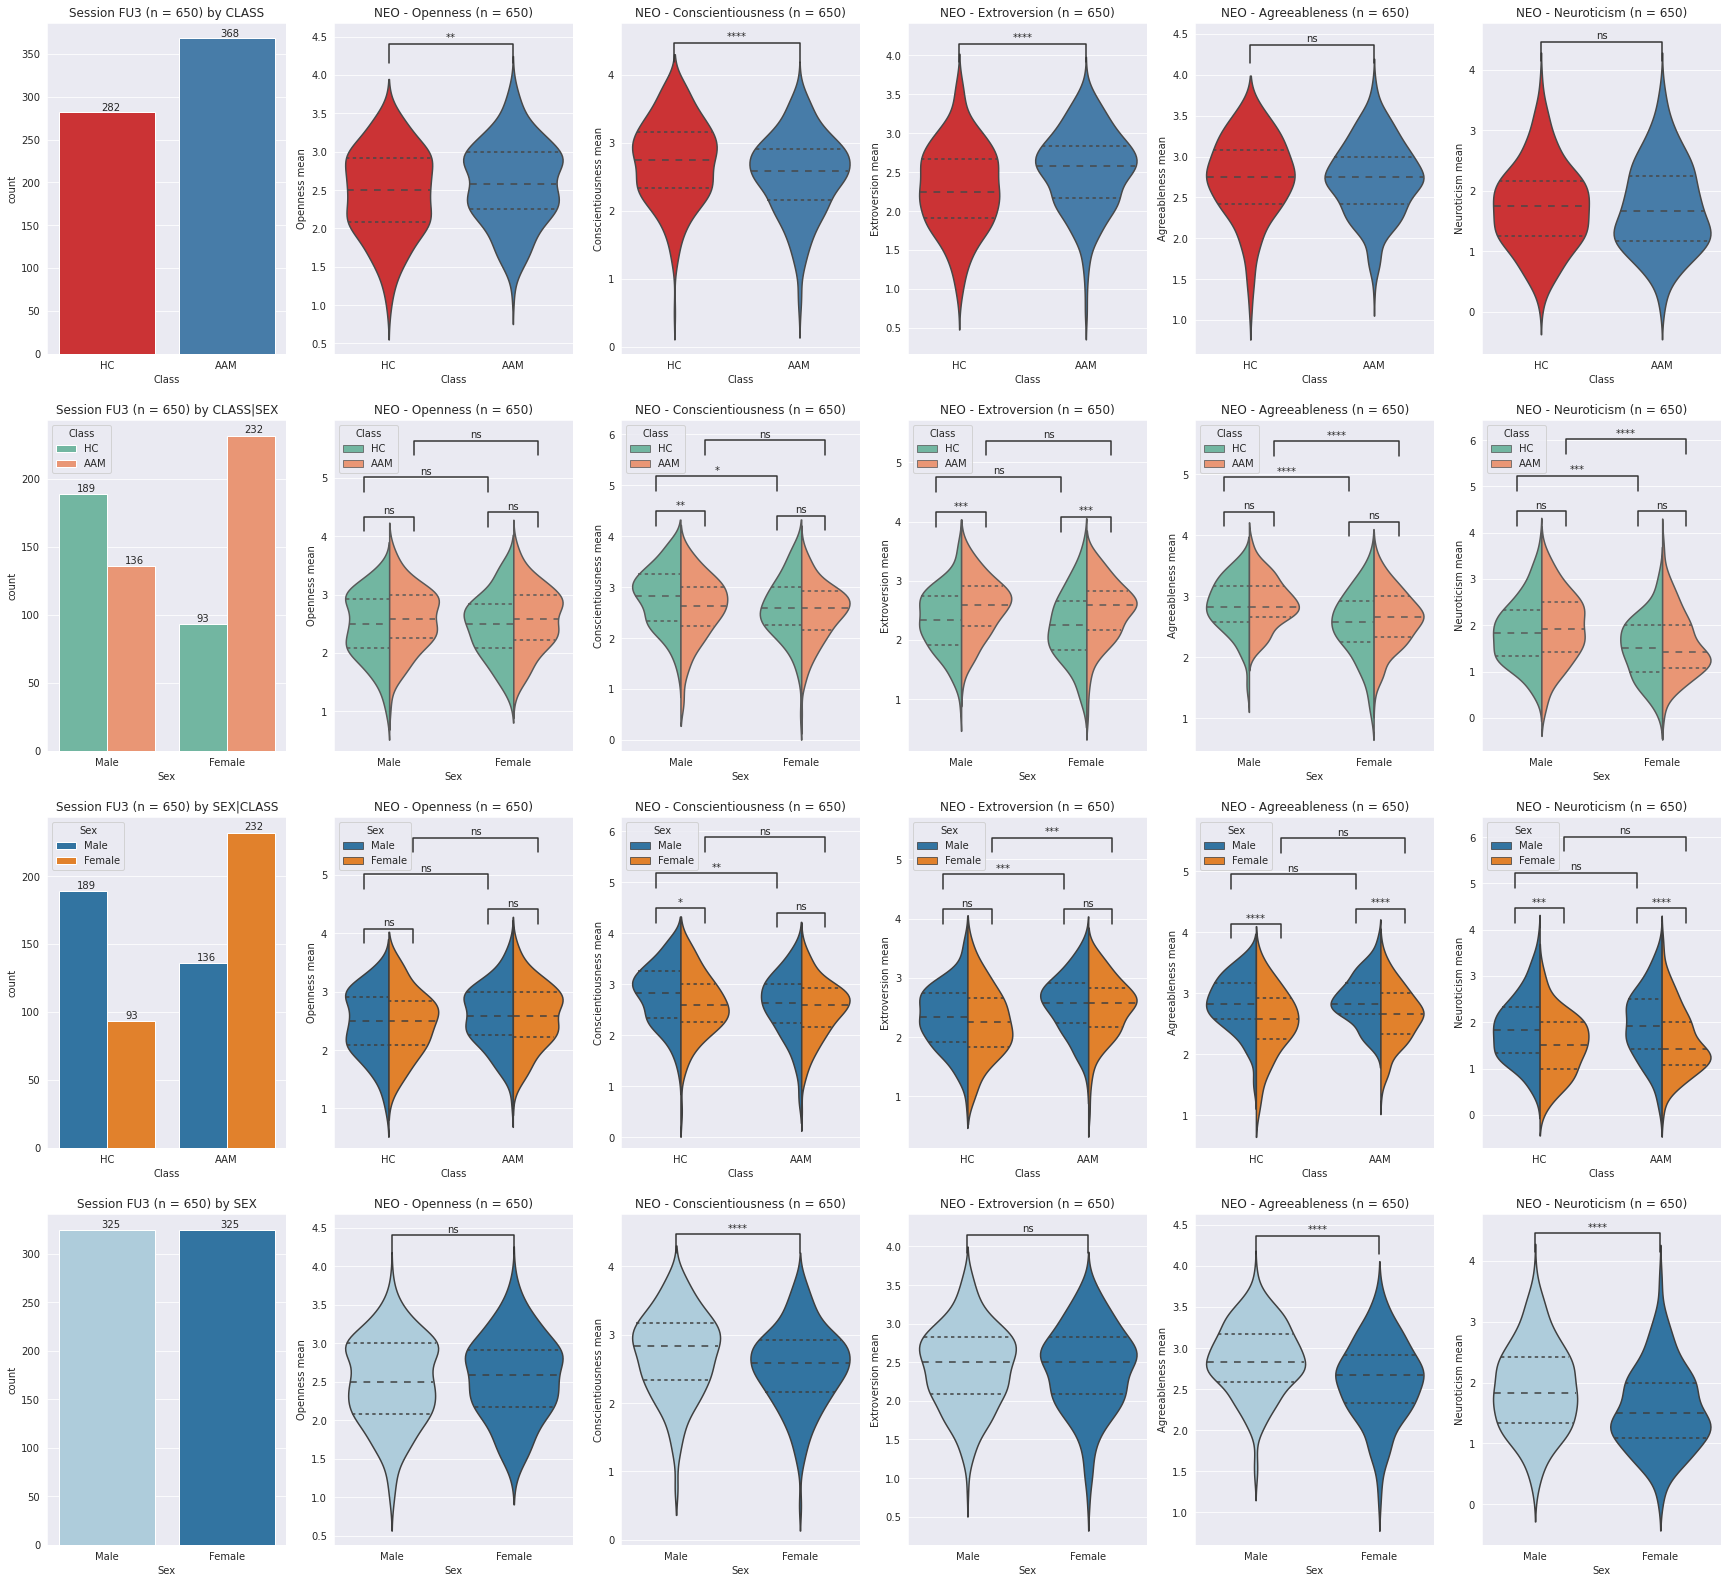

In [5]:
data = b_NEO
col = c_NEO

NEO_result = sc_plot('NEO', data, col)

In [6]:
# # Plot the result by Model prediction
# ses_data = tt_NEO
# # groupby Session
# ses = ses_data.groupby('Session')
# b_FU3 = ses.get_group('FU3')

# data = b_FU3
# col = c_NEO
# NEO_result = sc_plot('NEO', data, col)

<b> Plot the result by Model prediction </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. ('X', 'Binge', 'cb', 'LR')_AAM: t-test independent samples with Bonferroni correction, P_val=4.516e-02 stat=-2.545e+00
('X', 'Binge', 'cb', 'GB')_HC v.s. ('X', 'Binge', 'cb', 'GB')_AAM: t-test independent samples with Bonferroni correction, P_val=1.658e-02 stat=-2.882e+00
('X', 'Binge', 'cb', 'SVM-lin')_HC v.s. ('X', 'Binge', 'cb', 'SVM-lin')_AAM: t-test independent samples with Bonferroni correction, P_val=3.128e-02 stat=-2.673e+00
('X', 'Binge', 'cb', 'SVM-rbf')_HC v.s. ('X', 'Binge', 'cb', 'SVM-rbf')_AAM: t-test independent samples with Bonferroni correction, P_val=4.677e-03 stat=-3.267e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. (

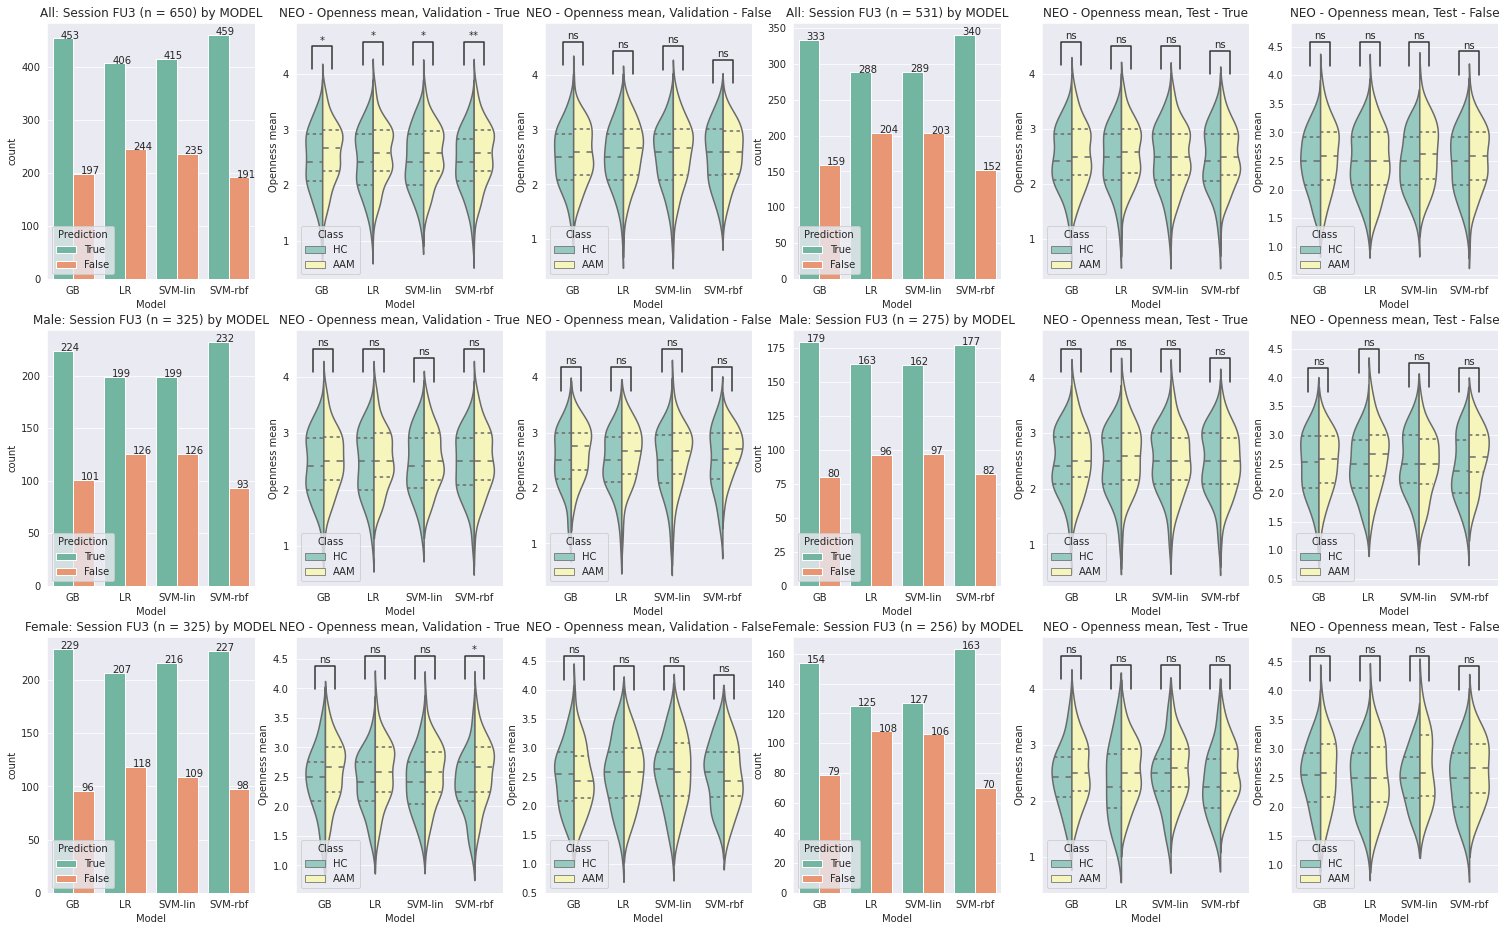

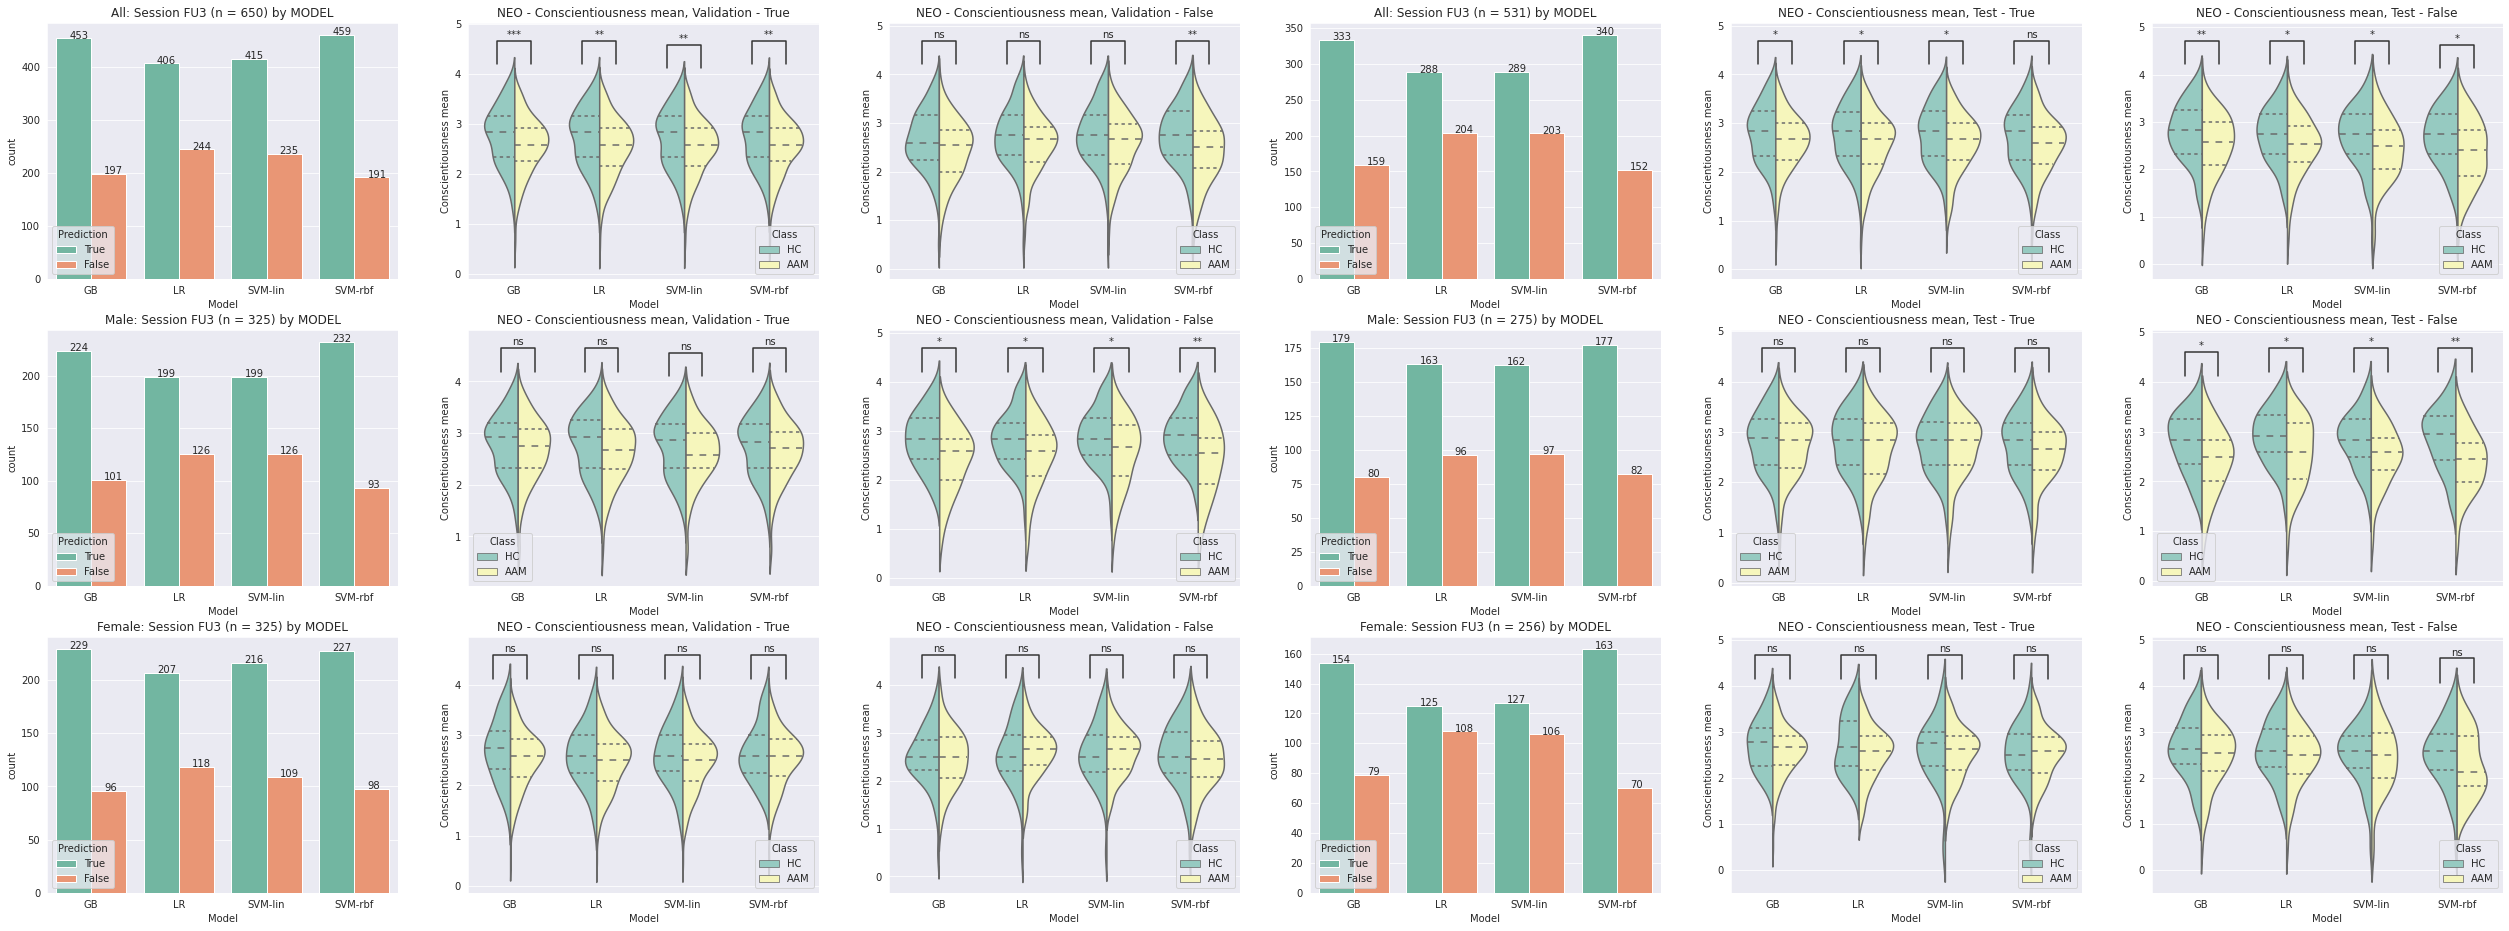

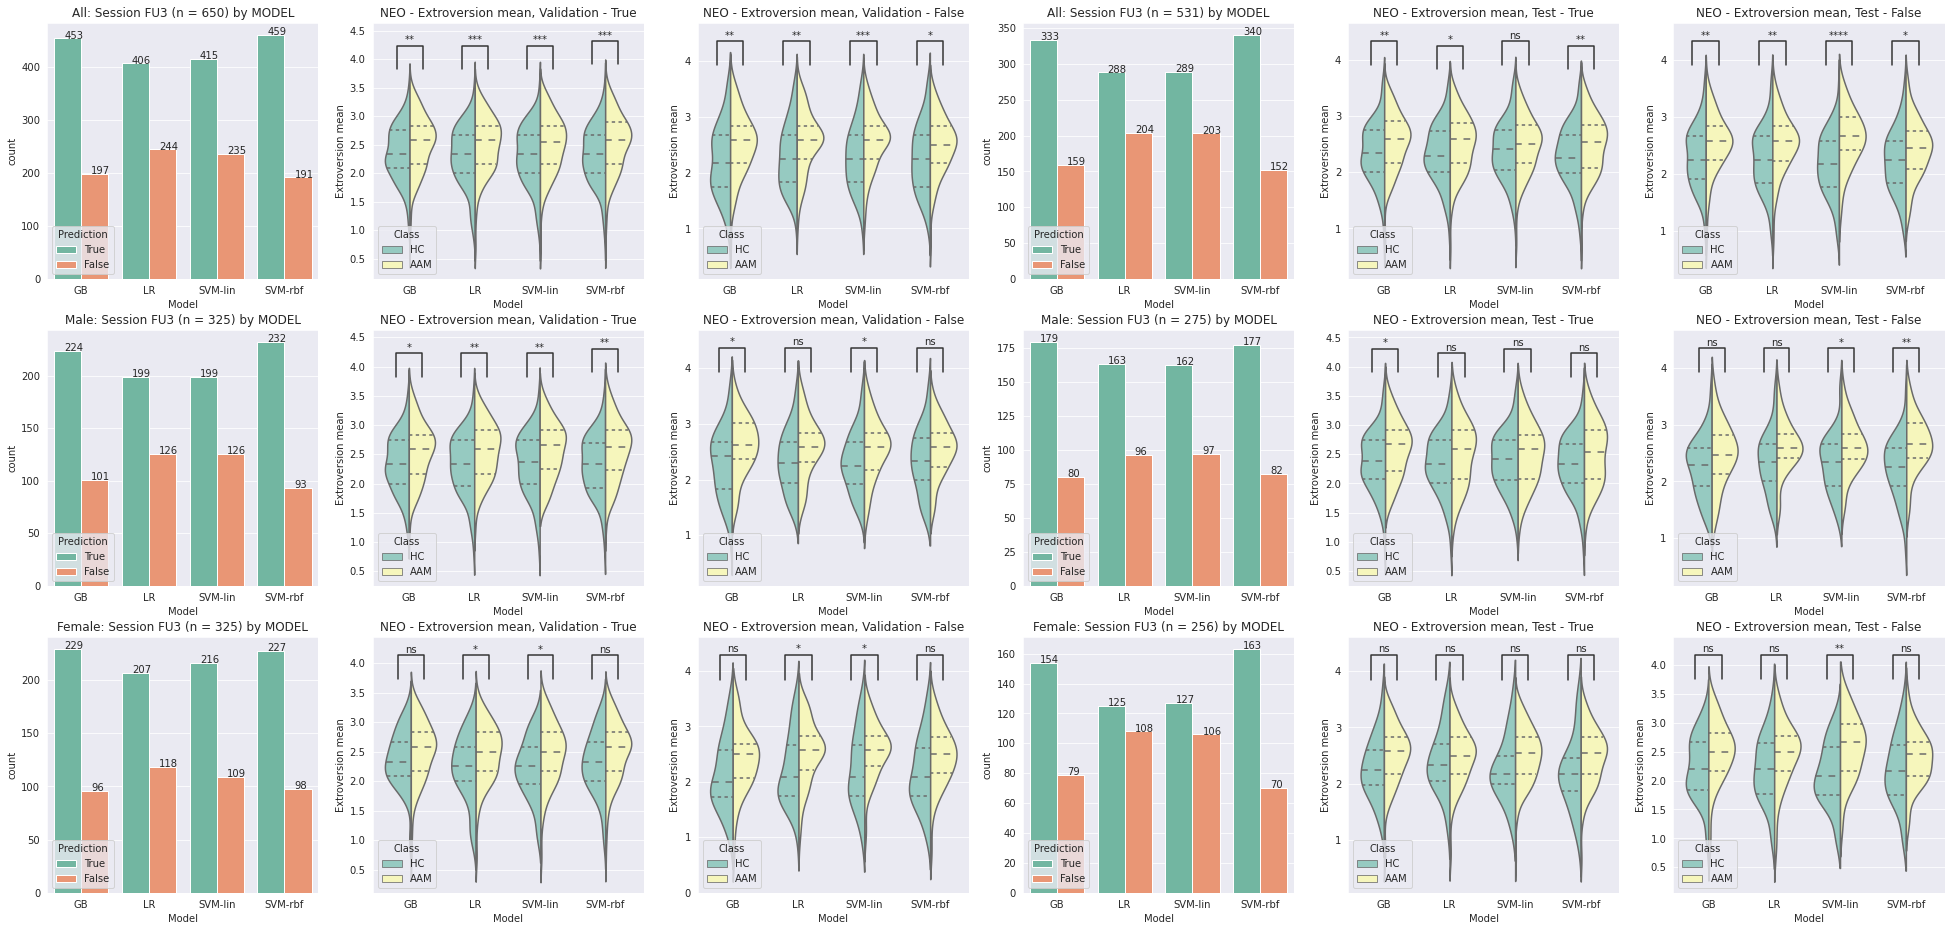

In [7]:
# Plot the result by Model prediction
ses_data = ph_NEO
# groupby Session
ses = ses_data.groupby('Session')
b_FU3 = ses.get_group('FU3')
train = b_FU3
# Plot the result by Model prediction
ses_data = tt_NEO
# groupby Session
ses = ses_data.groupby('Session')
b_FU3 = ses.get_group('FU3')
test = b_FU3
# Openness
col = c_NEO[0]
NEO_ML_result = ml_TF_plot('NEO', train, test, col)
# Conscietineuous
col = c_NEO[1]
NEO_ML_result = ml_TF_plot('NEO', train, test, col)
# Extroversion
col = c_NEO[2]
NEO_ML_result = ml_TF_plot('NEO', train, test, col)
# # Agreebleness
# col = c_NEO[3]
# NEO_ML_result = ml_plot('NEO', train, test, col)
# # Neuroticism
# col = c_NEO[4]
# NEO_ML_result = ml_plot('NEO', train, test, col)

### 3.2.2. SURPS

In [8]:
ses_data = b_SURPS
# groupby Session
ses = ses_data.groupby('Session')
b_FU3 = ses.get_group('FU3')
roi = b_FU3.columns[:4]

b_SURPS = b_FU3
c_SURPS = [roi[1],roi[0],roi[2],roi[3]]

<b> Plot the result by Sex & Class </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=9.627e-01 stat=-4.682e-02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=5.190e-01 stat=-6.452e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.643e-03 stat=-3.162e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with

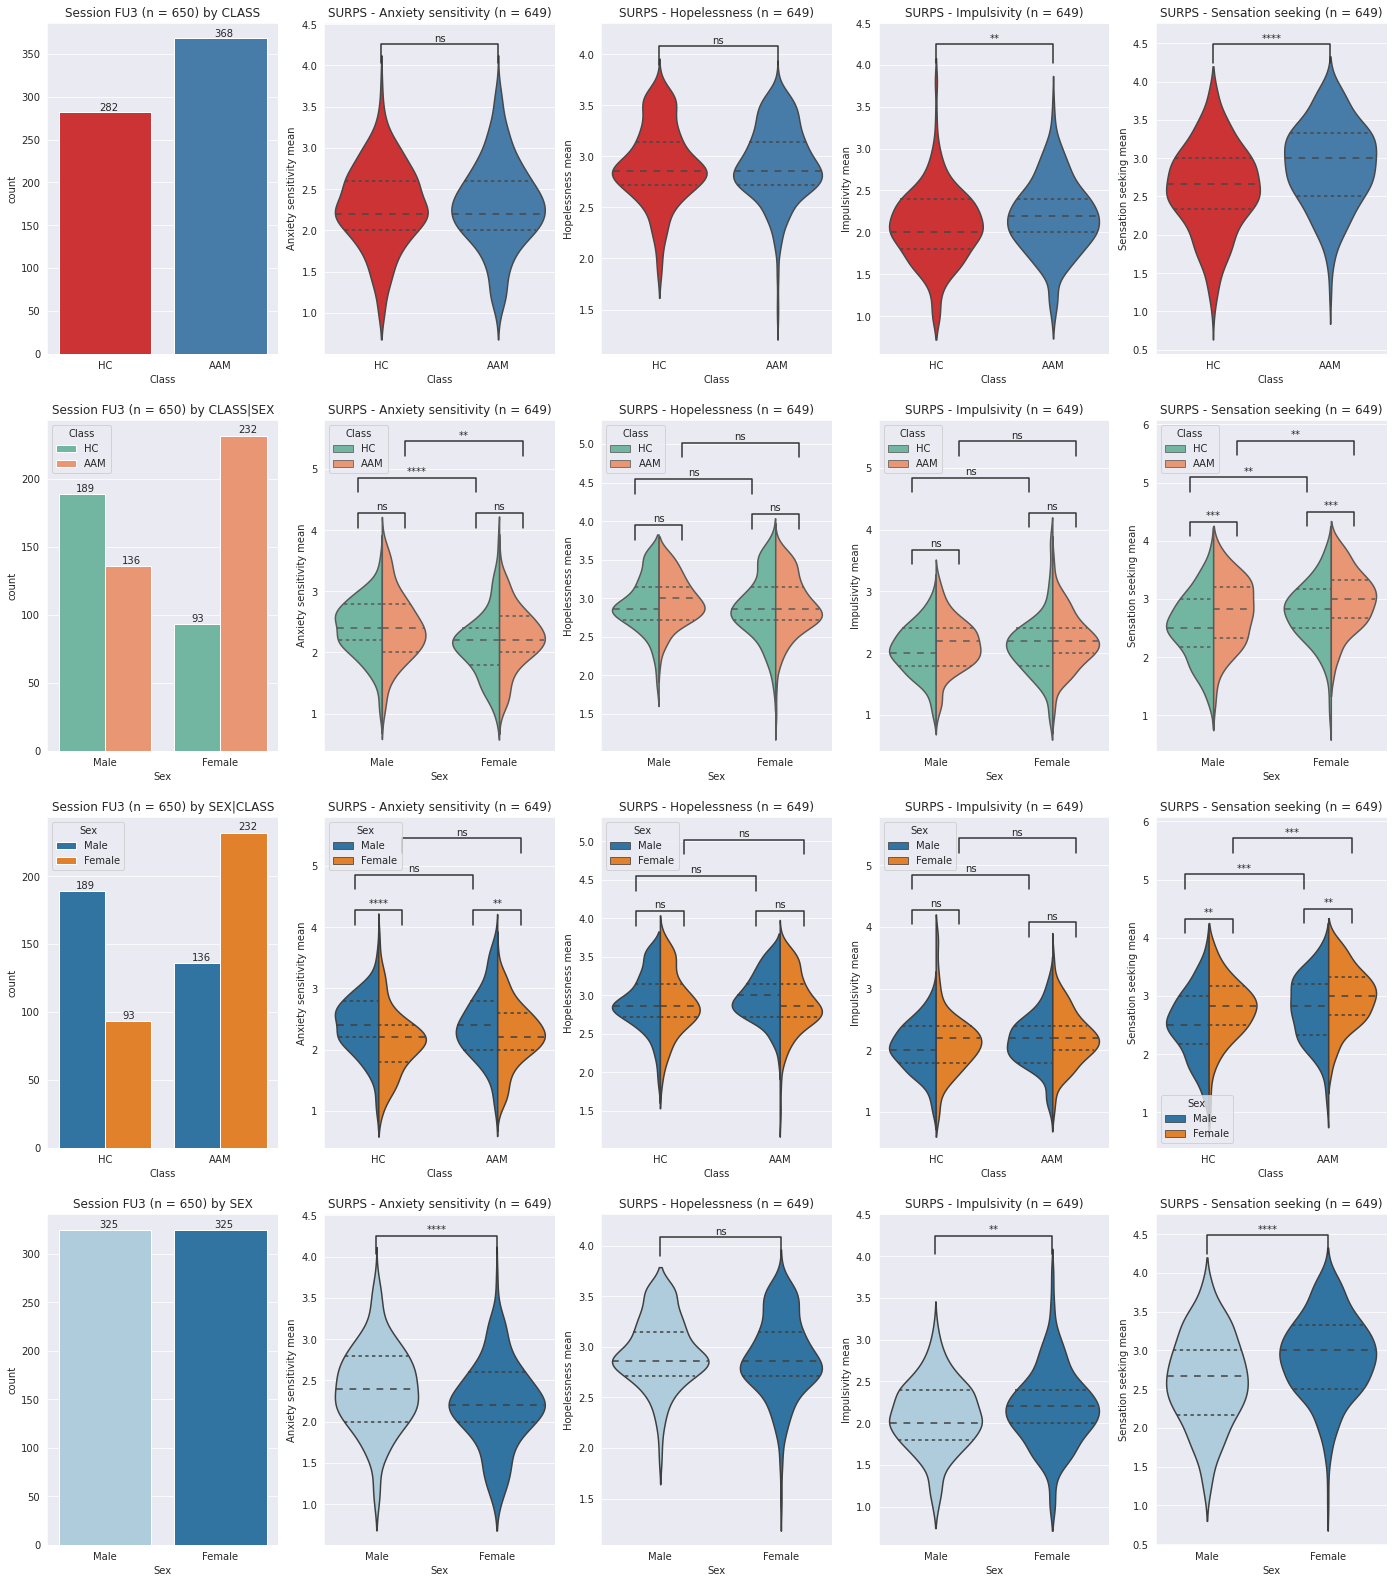

In [9]:
# Plot the result by Sex & Class
data = b_SURPS
col = c_SURPS
SURPS_result = sc_plot('SURPS', data, col)

In [10]:
# # Plot the result by Model prediction
# ses_data = tt_SURPS
# # groupby Session
# ses = ses_data.groupby('Session')
# b_FU3 = ses.get_group('FU3')

# data = b_FU3
# col = c_SURPS
# SURPS_result = sc_plot('NEO', data, col)

<b> Plot the result by Model prediction </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. ('X', 'Binge', 'cb', 'LR')_AAM: t-test independent samples with Bonferroni correction, P_val=3.687e-01 stat=-1.688e+00
('X', 'Binge', 'cb', 'GB')_HC v.s. ('X', 'Binge', 'cb', 'GB')_AAM: t-test independent samples with Bonferroni correction, P_val=3.070e-01 stat=-1.774e+00
('X', 'Binge', 'cb', 'SVM-lin')_HC v.s. ('X', 'Binge', 'cb', 'SVM-lin')_AAM: t-test independent samples with Bonferroni correction, P_val=4.747e-02 stat=-2.527e+00
('X', 'Binge', 'cb', 'SVM-rbf')_HC v.s. ('X', 'Binge', 'cb', 'SVM-rbf')_AAM: t-test independent samples with Bonferroni correction, P_val=3.835e-01 stat=-1.669e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. (

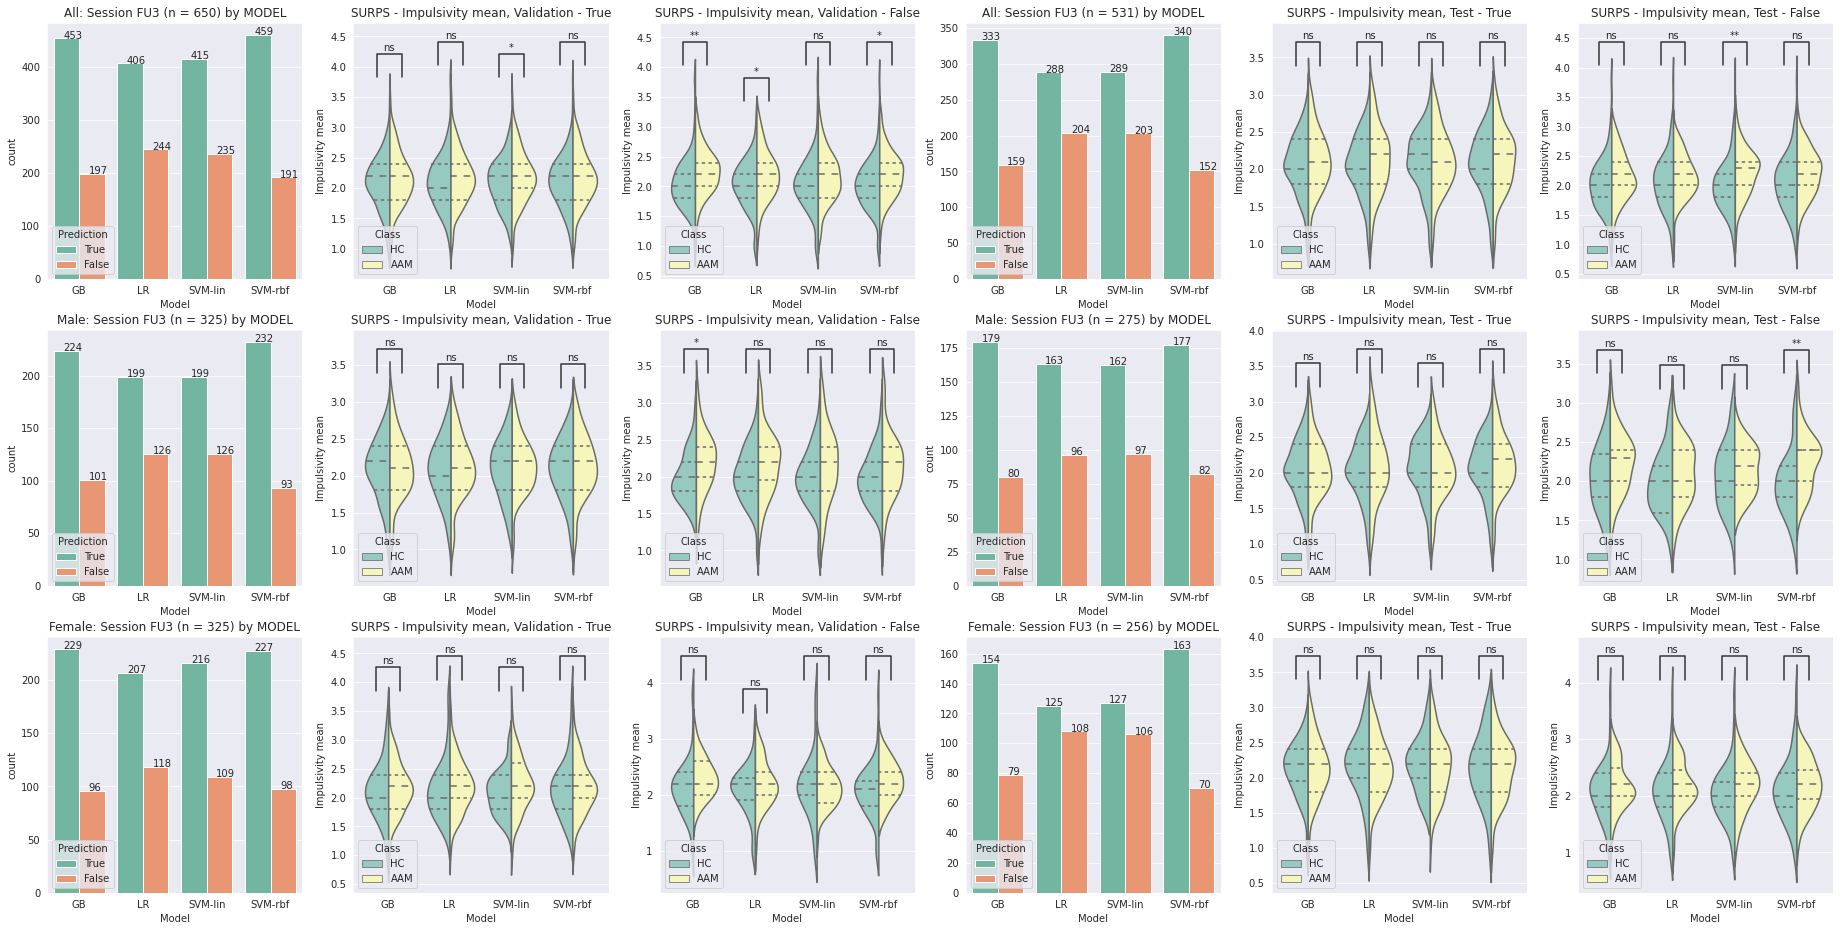

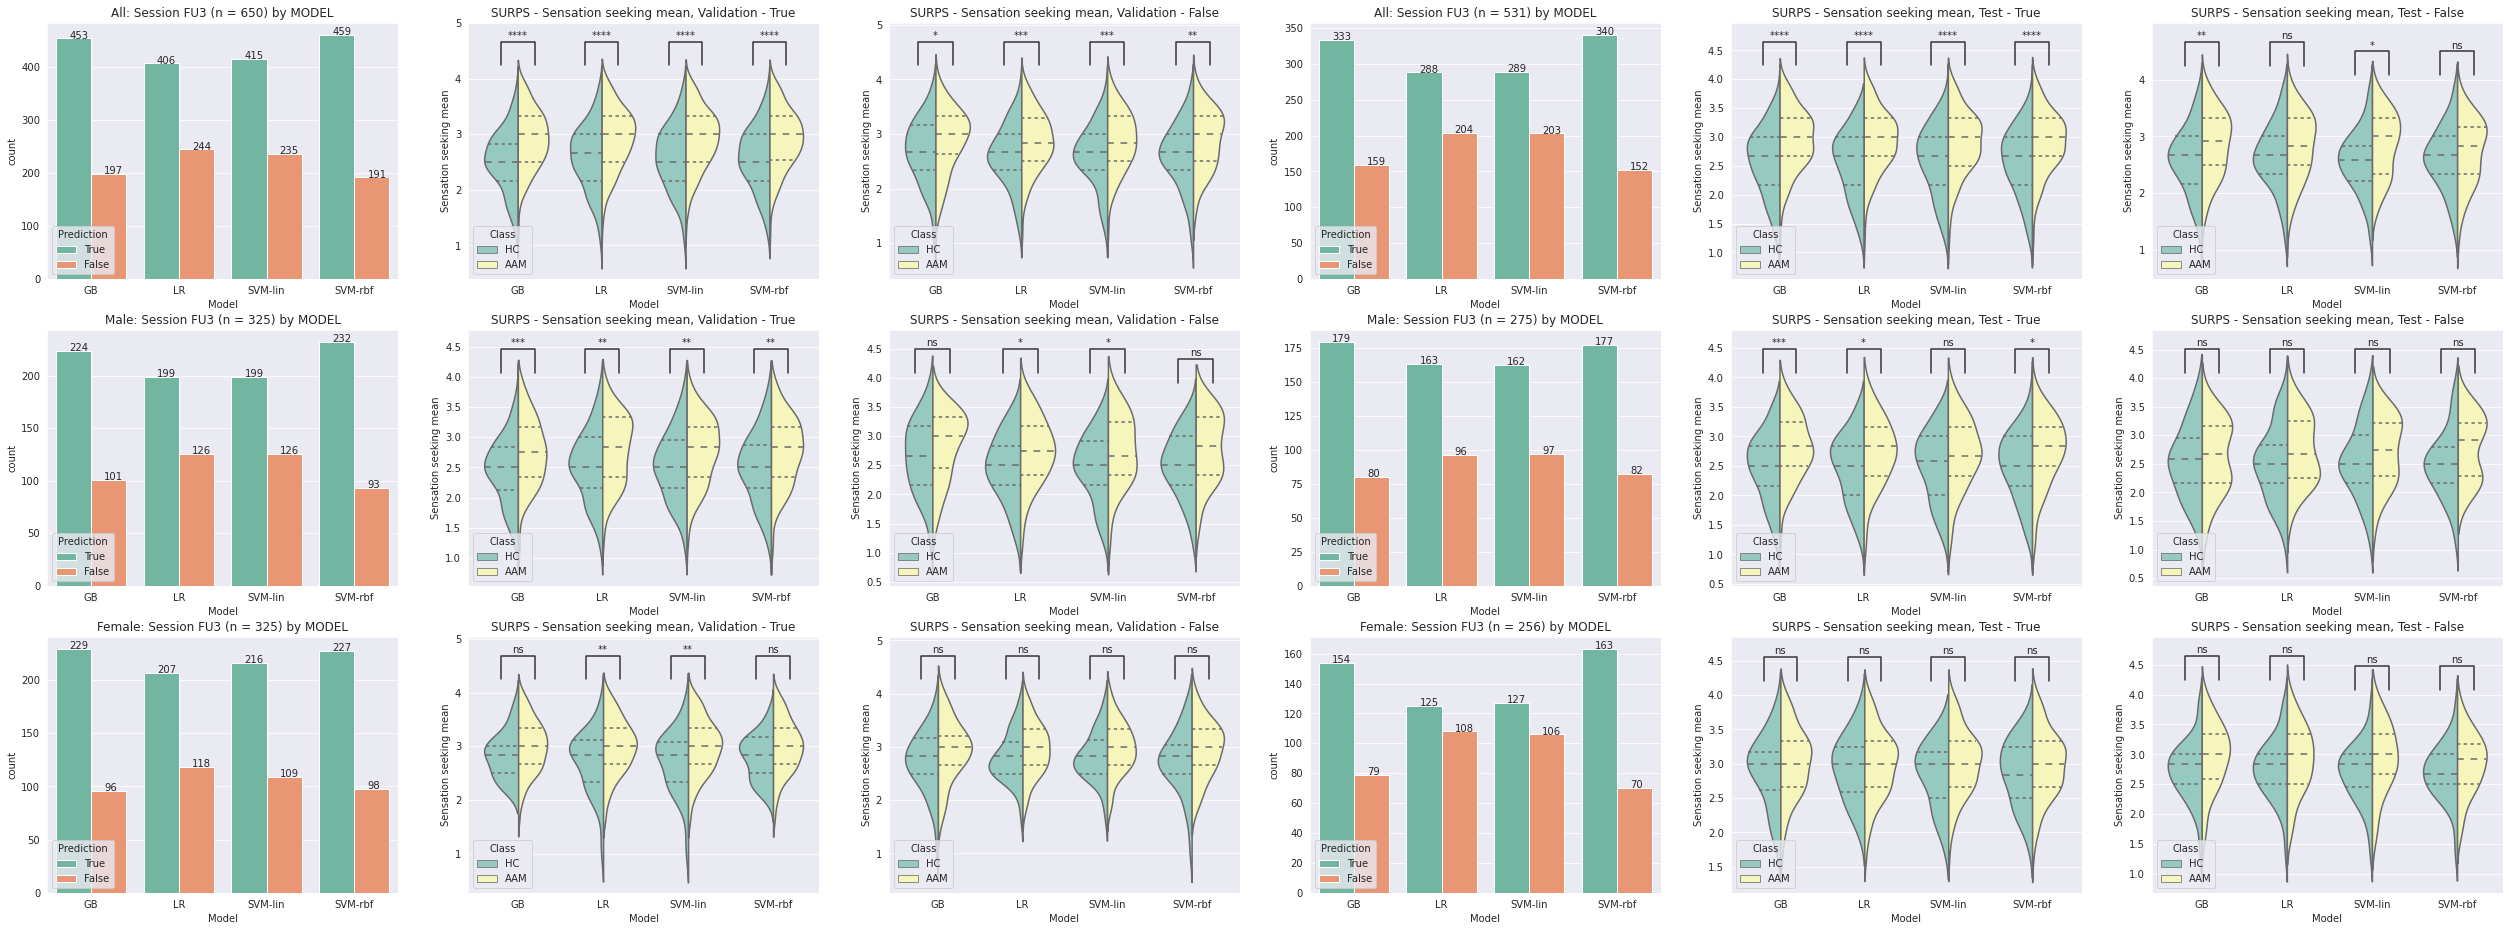

In [11]:
# Plot the result by Model prediction
ses_data = ph_SURPS
# groupby Session
ses = ses_data.groupby('Session')
b_FU3 = ses.get_group('FU3')
train = b_FU3
# Plot the result by Model prediction
ses_data = tt_SURPS
# groupby Session
ses = ses_data.groupby('Session')
b_FU3 = ses.get_group('FU3')
test = b_FU3
# # Hopelessness
# col = c_SURPS[0]
# SURPS_ML_result = ml_plot('SURPS', train, test, col)
# # Anxiety sensitivity
# col = c_SURPS[1]
# SURPS_ML_result = ml_plot('SURPS', train, test, col)
# Impulsivity
col = c_SURPS[2]
SURPS_ML_result = ml_TF_plot('SURPS', train, test, col)
# Sensation seeking
col = c_SURPS[3]
SURPS_ML_result = ml_TF_plot('SURPS', train, test, col)

### 3.2.3. CTQ

In [12]:
# Select the session: FU2
roi = b_CTQ.columns[:6]
c_CTQ = [roi[5], roi[0], roi[3], roi[1], roi[4], roi[2]]

<b> Plot the result by Sex & Class </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.223e-03 stat=3.251e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.750e-01 stat=-1.358e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.321e-01 stat=1.508e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with B

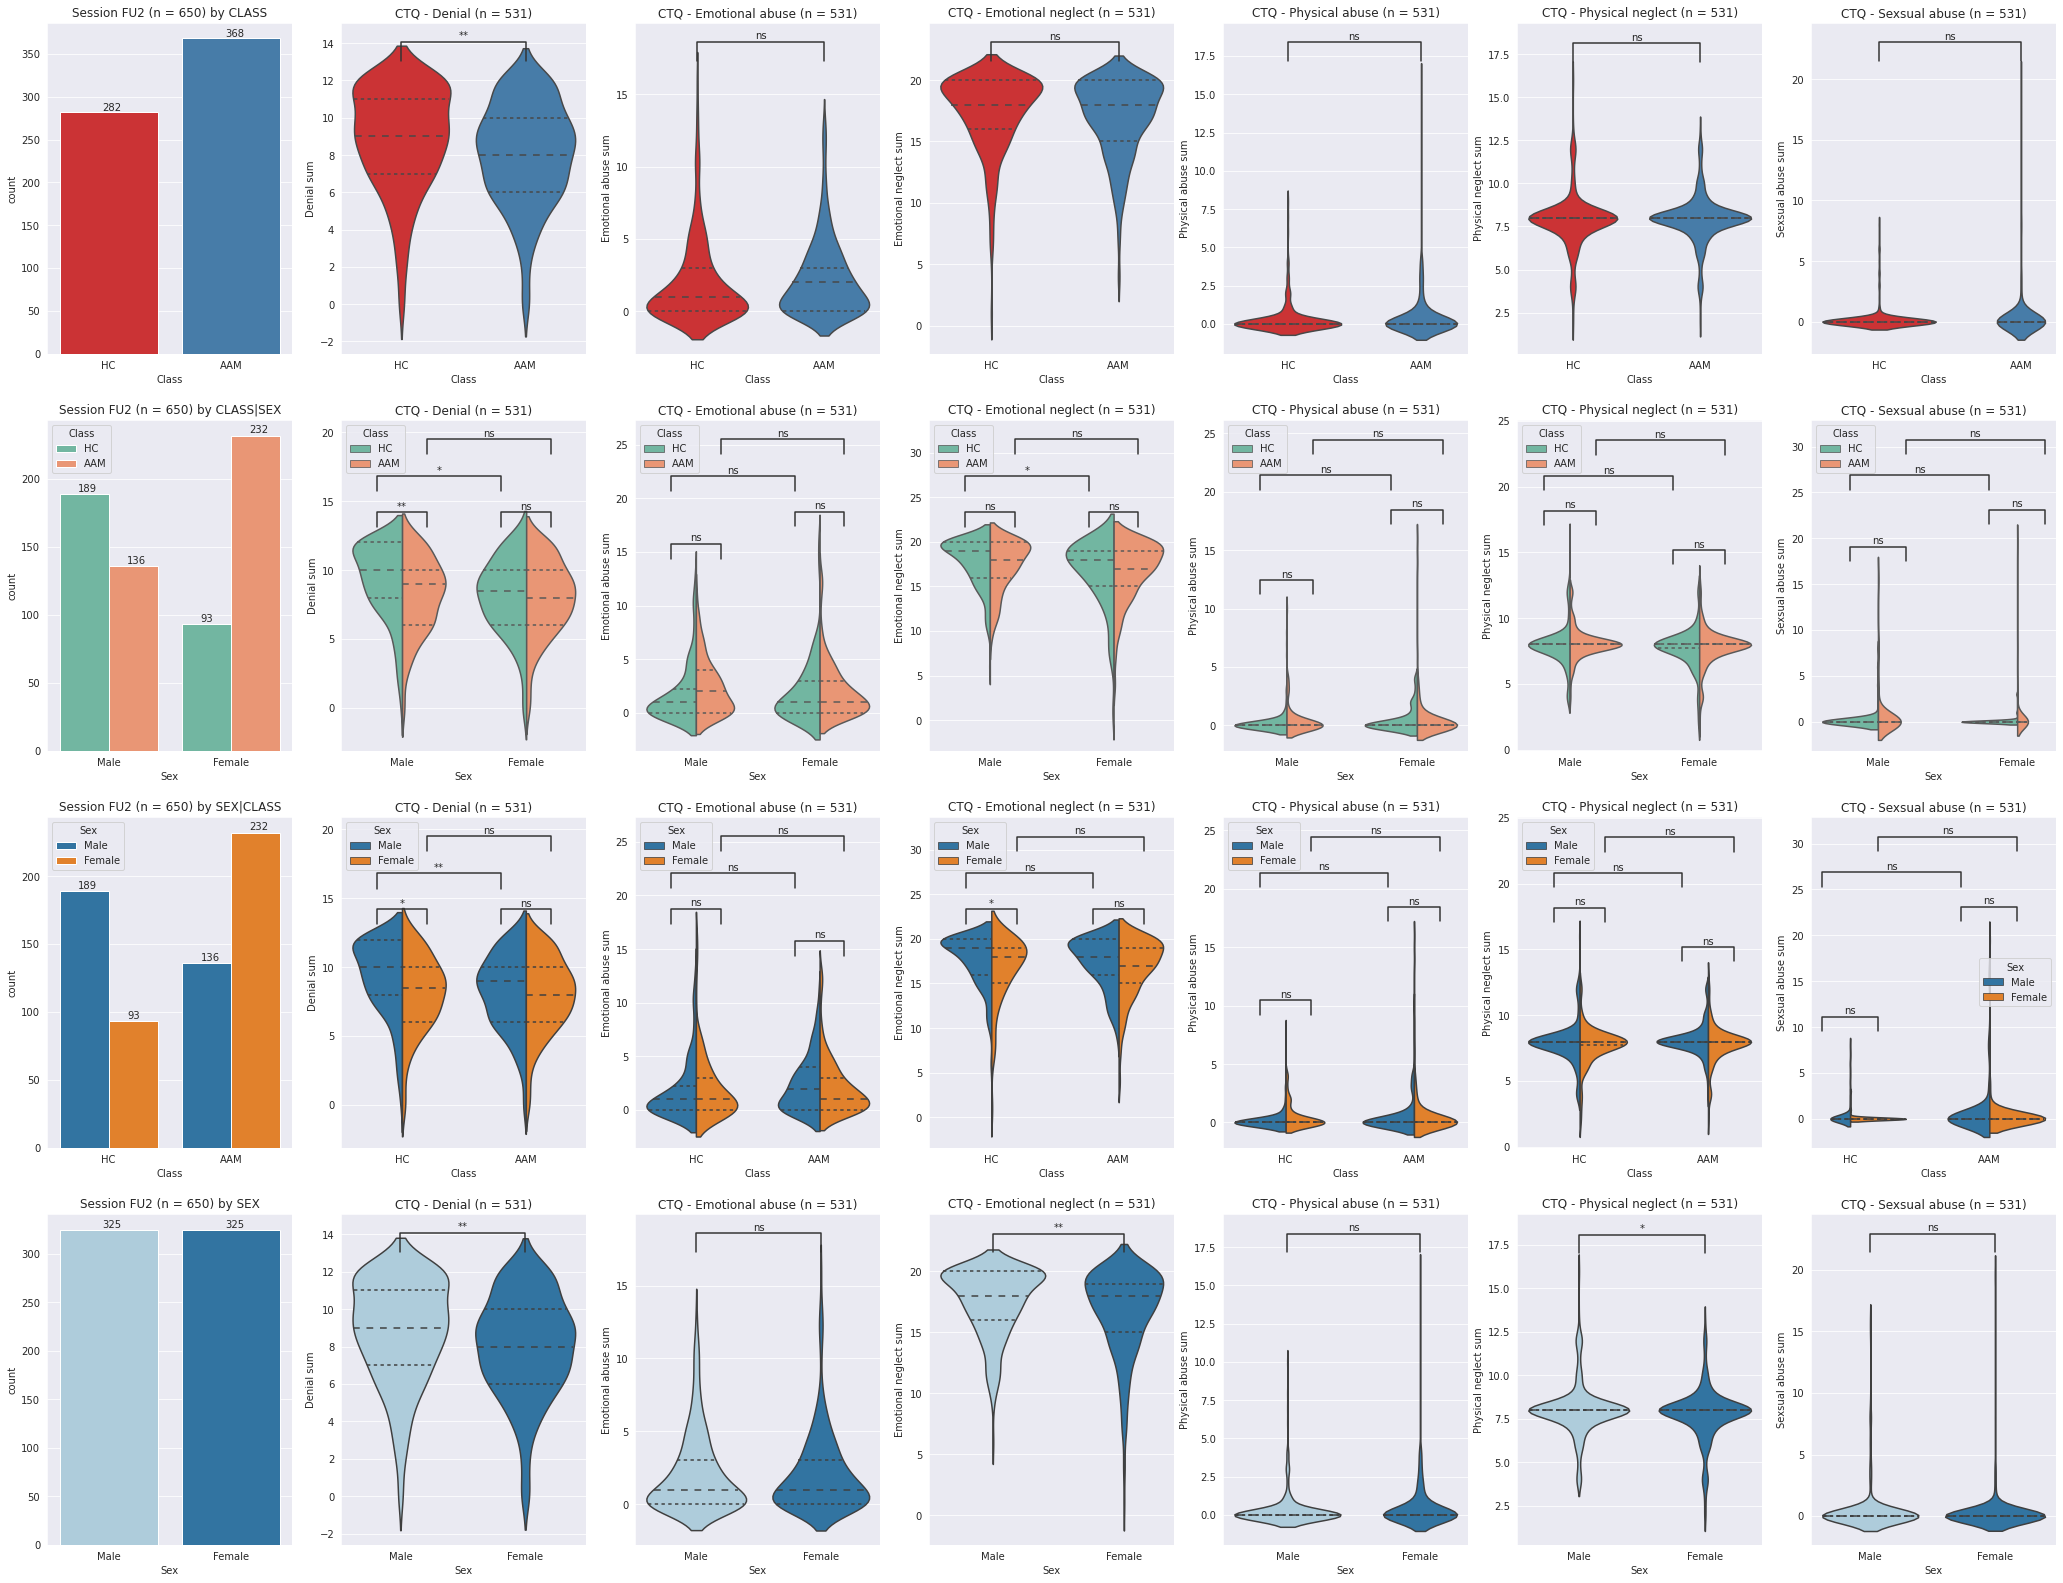

In [13]:
# Plot the result by Sex & Class
data = b_CTQ
col = c_CTQ
CTQ_result = sc_plot('CTQ', data, col)

In [14]:
# # Plot the result by Model prediction
# data = tt_CTQ
# col = c_CTQ
# CTQ_result = sc_plot('NEO', data, col)

<b> Plot the result by Model prediction </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. ('X', 'Binge', 'cb', 'LR')_AAM: t-test independent samples with Bonferroni correction, P_val=3.269e-02 stat=2.661e+00
('X', 'Binge', 'cb', 'GB')_HC v.s. ('X', 'Binge', 'cb', 'GB')_AAM: t-test independent samples with Bonferroni correction, P_val=2.007e-03 stat=3.510e+00
('X', 'Binge', 'cb', 'SVM-lin')_HC v.s. ('X', 'Binge', 'cb', 'SVM-lin')_AAM: t-test independent samples with Bonferroni correction, P_val=1.074e-03 stat=3.683e+00
('X', 'Binge', 'cb', 'SVM-rbf')_HC v.s. ('X', 'Binge', 'cb', 'SVM-rbf')_AAM: t-test independent samples with Bonferroni correction, P_val=2.486e-04 stat=4.050e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. ('X',

[Predict  Model                         Class
 False    ('X-Binge', 'cb', 'GB')       AAM      7.655172
                                        HC       8.638889
          ('X-Binge', 'cb', 'LR')       AAM      8.019231
                                        HC       8.710526
          ('X-Binge', 'cb', 'SVM-lin')  AAM      7.888889
                                        HC       8.186047
          ('X-Binge', 'cb', 'SVM-rbf')  AAM      8.210526
                                        HC       8.305556
 True     ('X-Binge', 'cb', 'GB')       AAM      8.144231
                                        HC       7.095238
          ('X-Binge', 'cb', 'LR')       AAM      8.049383
                                        HC       6.789474
          ('X-Binge', 'cb', 'SVM-lin')  AAM      8.113636
                                        HC       7.714286
          ('X-Binge', 'cb', 'SVM-rbf')  AAM      8.008772
                                        HC       7.666667
 Name: Denial sum, dtype: 

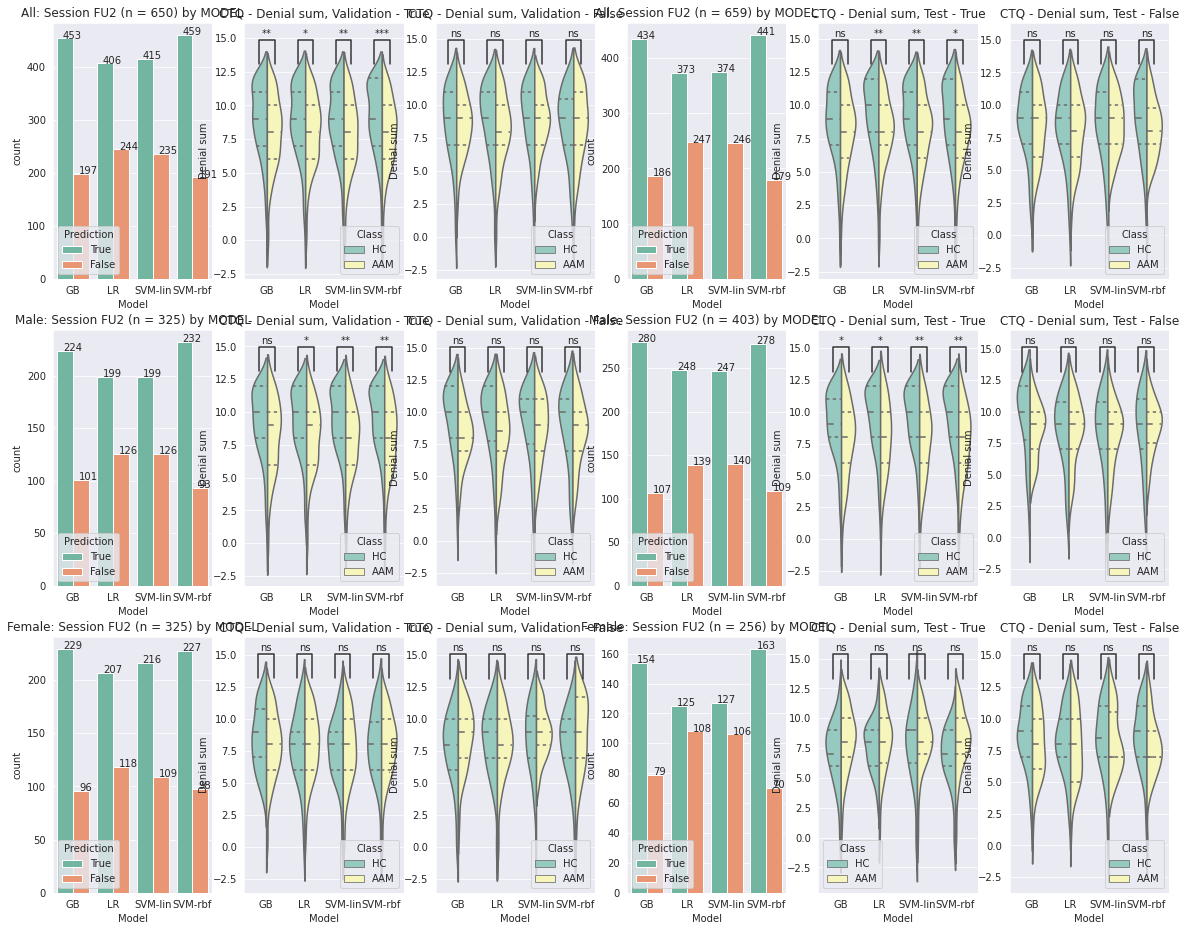

In [15]:
# Plot the result by Model prediction
train = ph_CTQ
test = tt_CTQ
# Denial sum
col = ph_CTQ.columns[5]
CTQ_ML_result = ml_TF_plot('CTQ', train, test, col)
CTQ_ML_result

### 3.2.4. LEQ

In [16]:
# Select the session: FU3
ses_data = b_LEQ
# groupby Session
ses = ses_data.groupby('Session')
b_FU3 = ses.get_group('FU3')
c_LEQ = b_LEQ.columns[0:8]

<b> Plot the result by Sex & Class </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=7.434e-01 stat=3.275e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.402e-02 stat=2.262e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.784e-02 stat=2.204e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bo

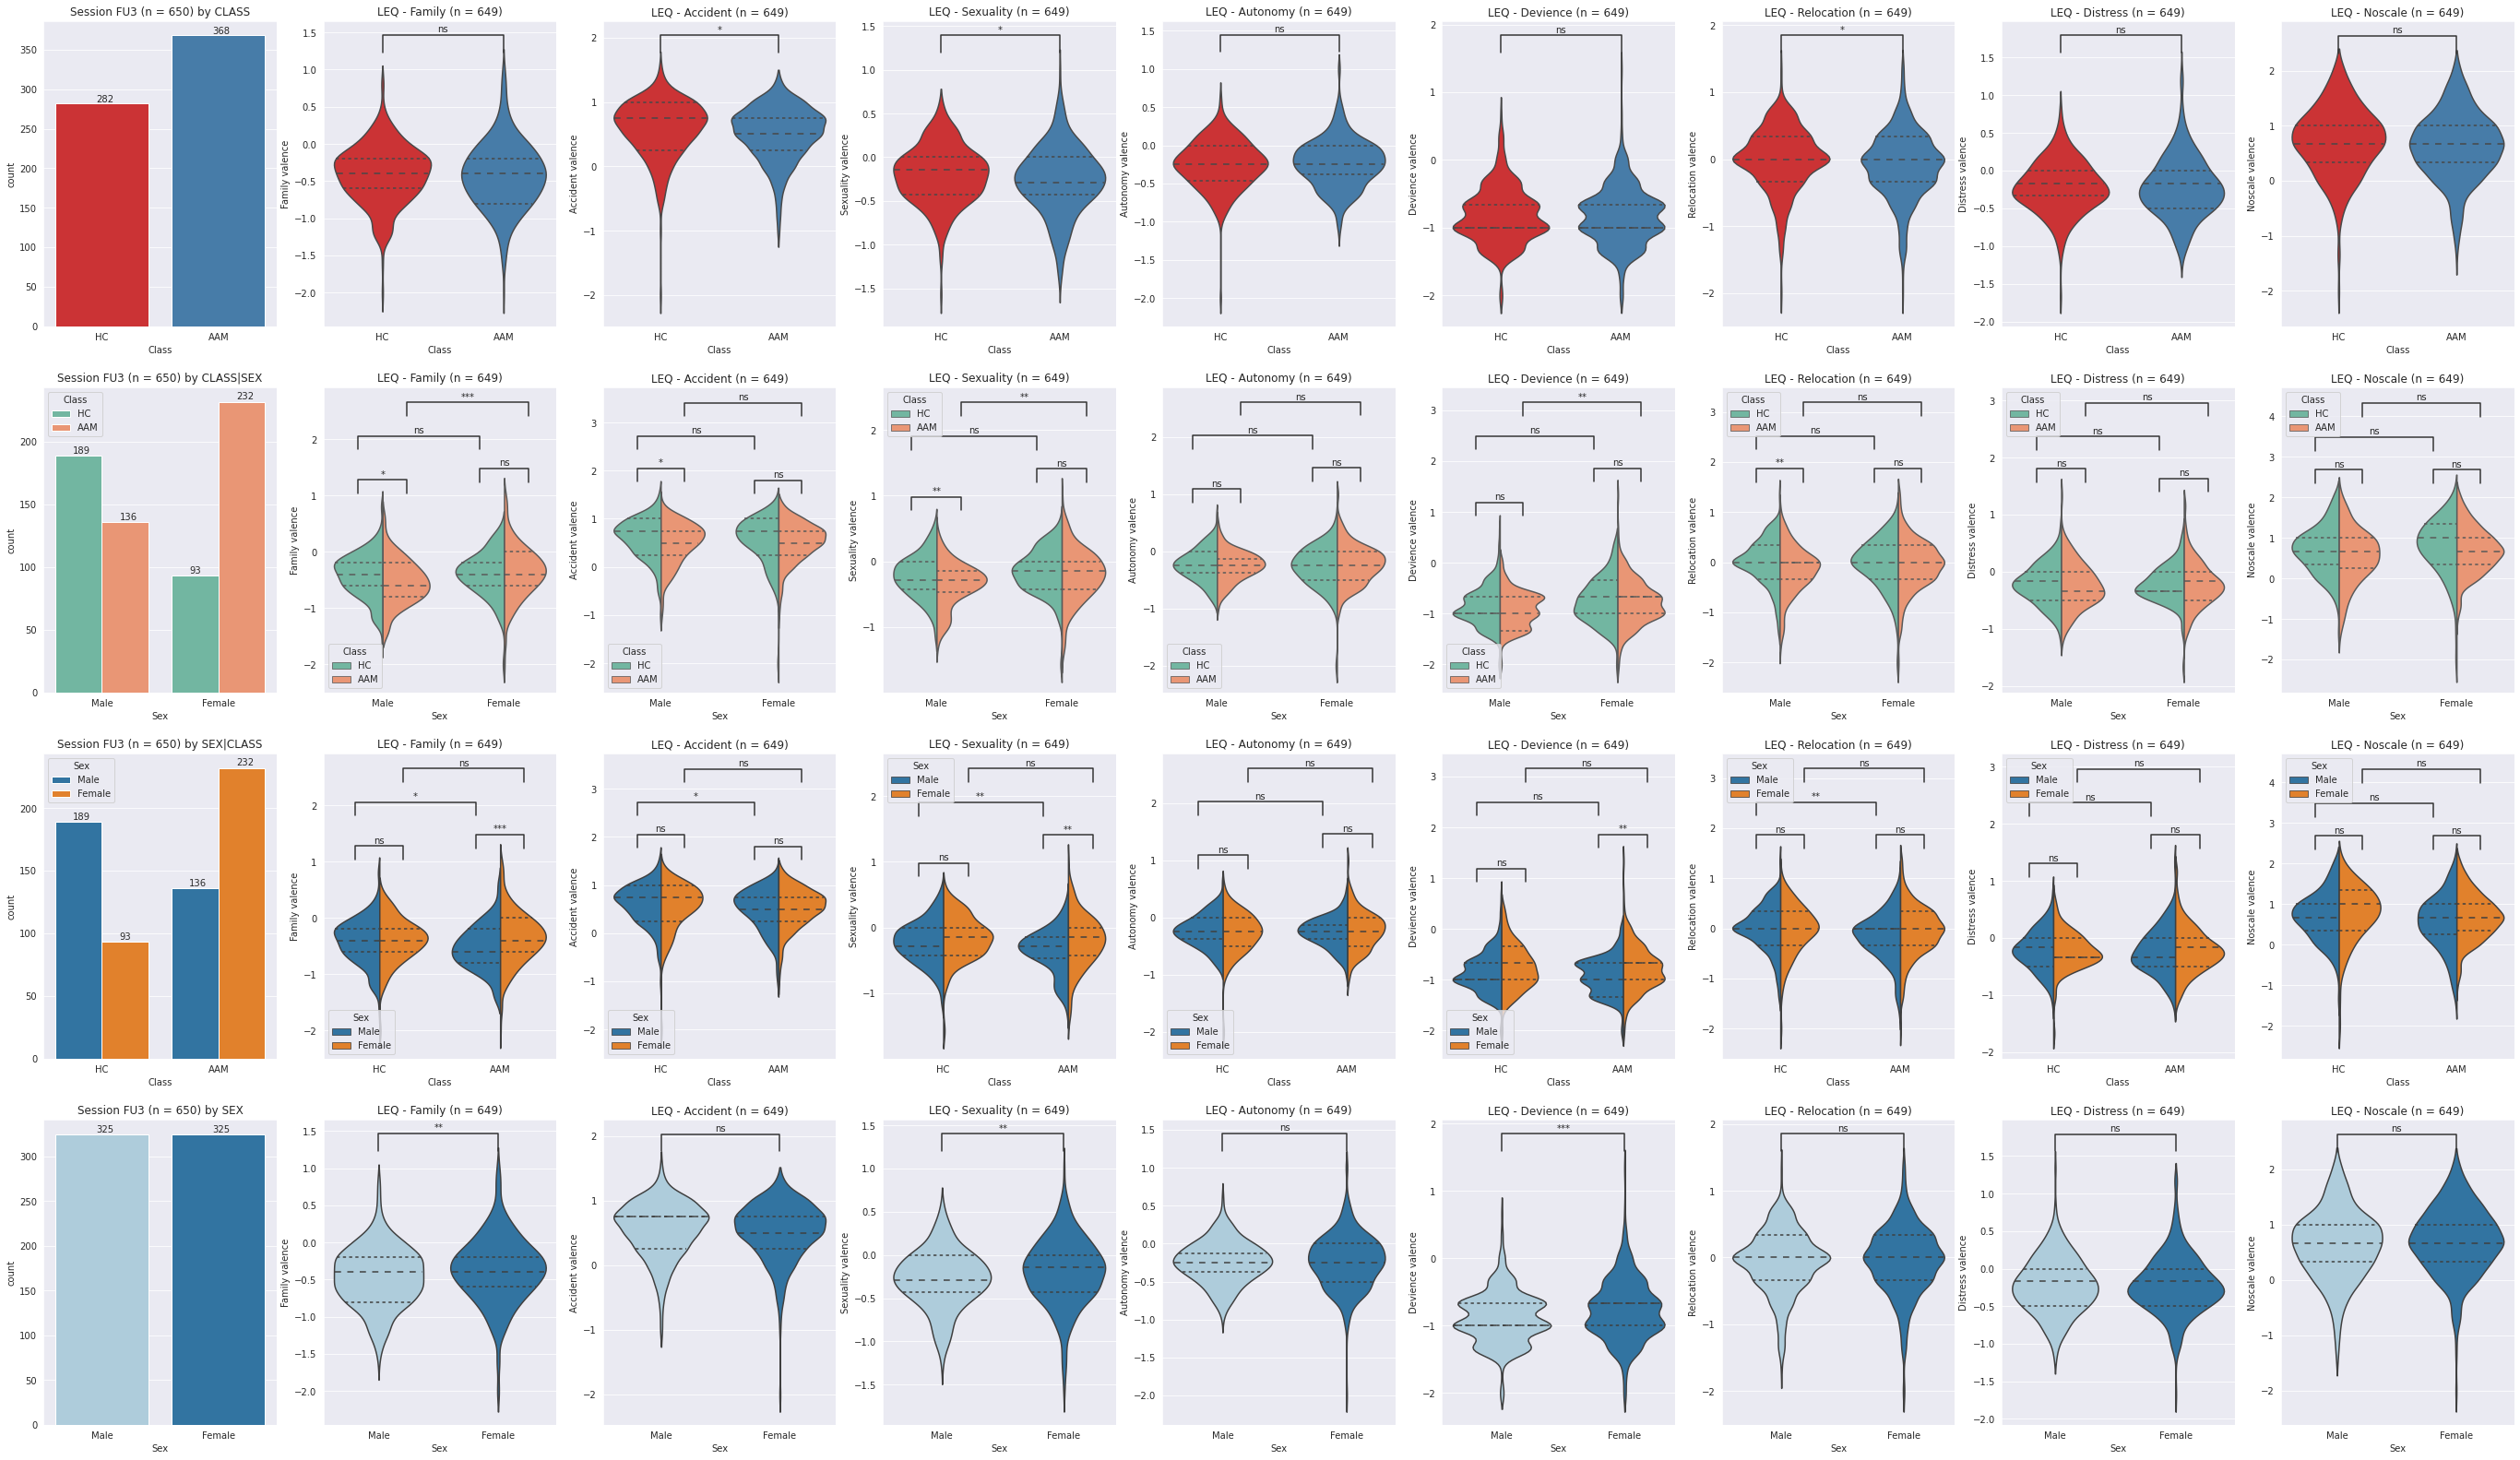

In [17]:
# Plot the result by Sex & Class
data = b_FU3
col = c_LEQ
LEQ_result = sc_plot('LEQ', data, col)

In [18]:
# # Select the session: FU3
# ses_data = tt_LEQ
# # groupby Session
# ses = ses_data.groupby('Session')
# b_FU3 = ses.get_group('FU3')
# c_LEQ = b_LEQ.columns[0:8]
# # Plot the result by Sex & Class
# data = b_FU3
# col = c_LEQ
# LEQ_result = sc_plot('LEQ', data, col)

<b> Plot the result by Model prediction </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. ('X', 'Binge', 'cb', 'LR')_AAM: t-test independent samples with Bonferroni correction, P_val=3.329e-03 stat=3.367e+00
('X', 'Binge', 'cb', 'GB')_HC v.s. ('X', 'Binge', 'cb', 'GB')_AAM: t-test independent samples with Bonferroni correction, P_val=1.775e-03 stat=3.539e+00
('X', 'Binge', 'cb', 'SVM-lin')_HC v.s. ('X', 'Binge', 'cb', 'SVM-lin')_AAM: t-test independent samples with Bonferroni correction, P_val=1.663e-02 stat=2.882e+00
('X', 'Binge', 'cb', 'SVM-rbf')_HC v.s. ('X', 'Binge', 'cb', 'SVM-rbf')_AAM: t-test independent samples with Bonferroni correction, P_val=3.306e-03 stat=3.366e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. ('X',

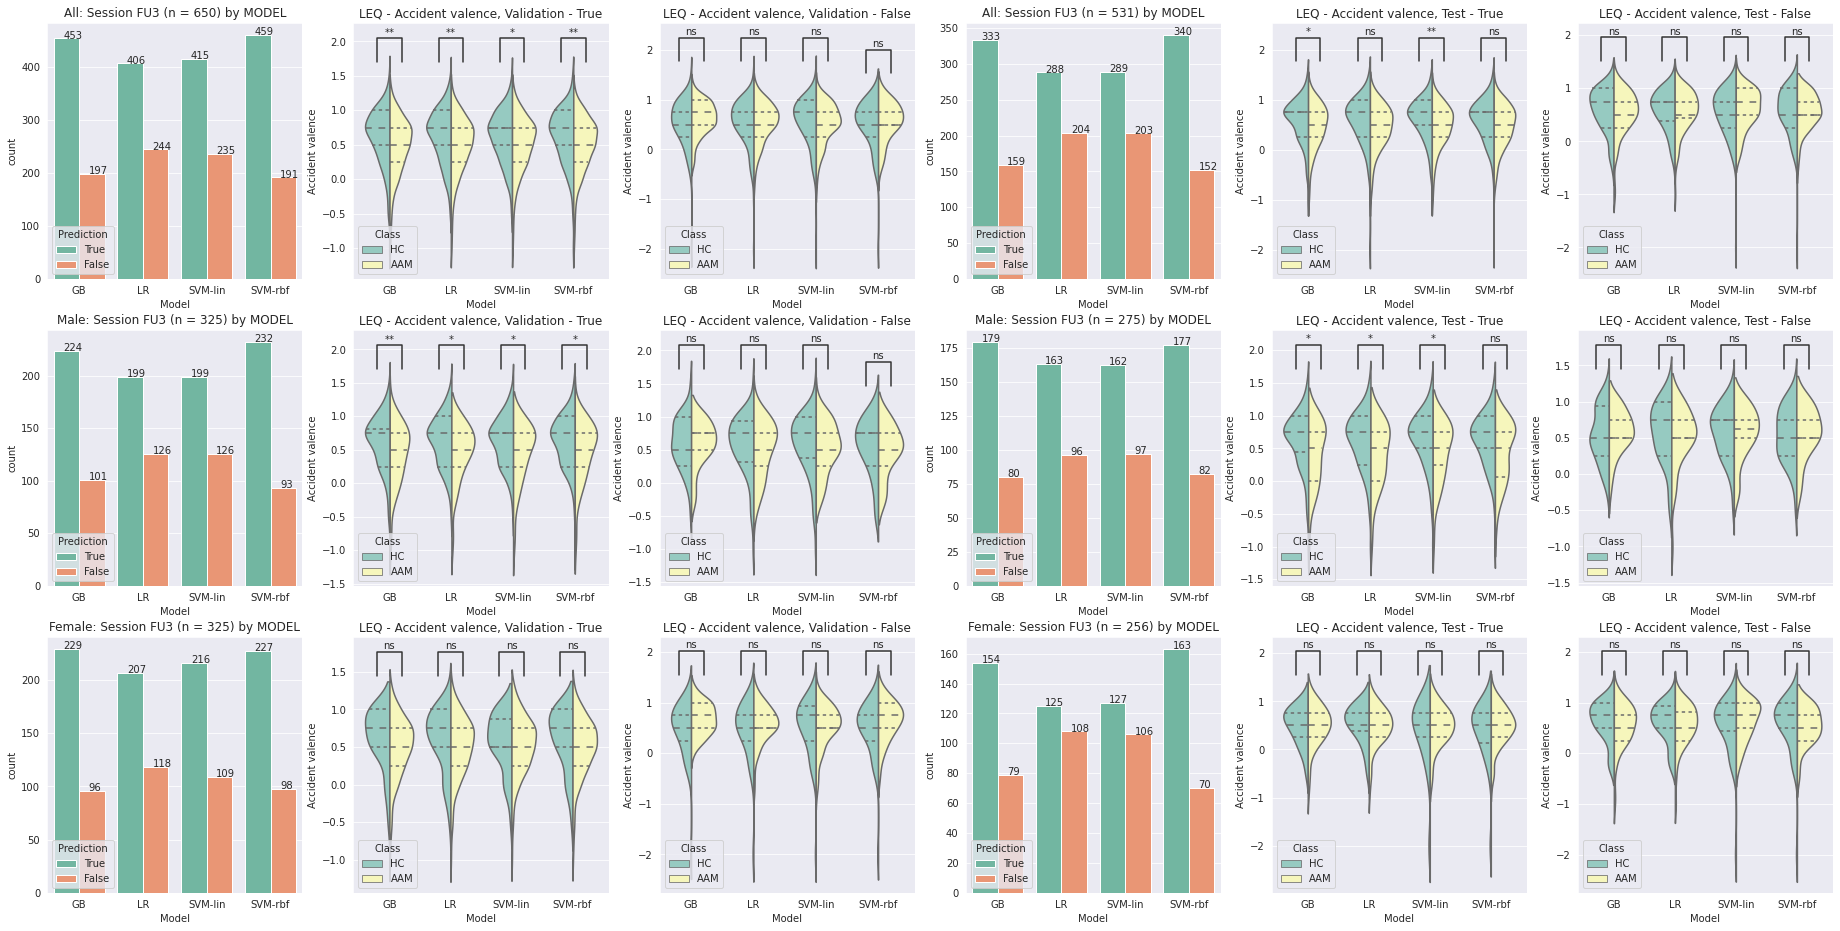

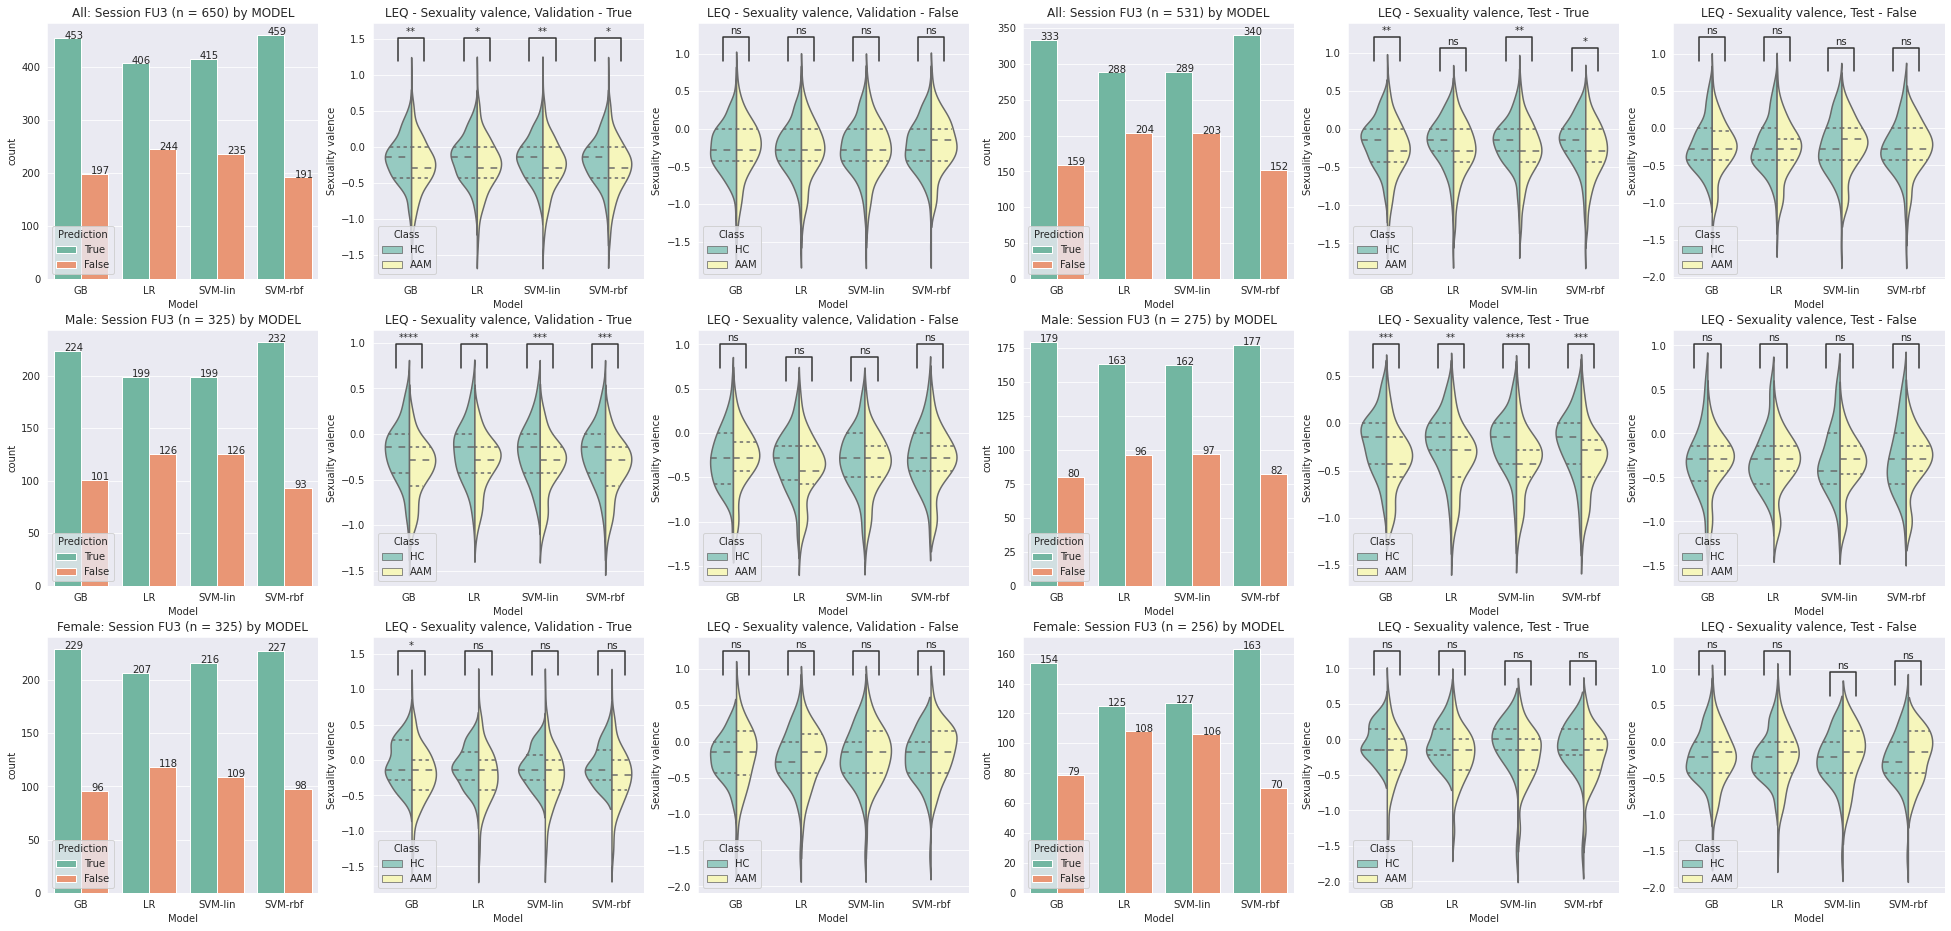

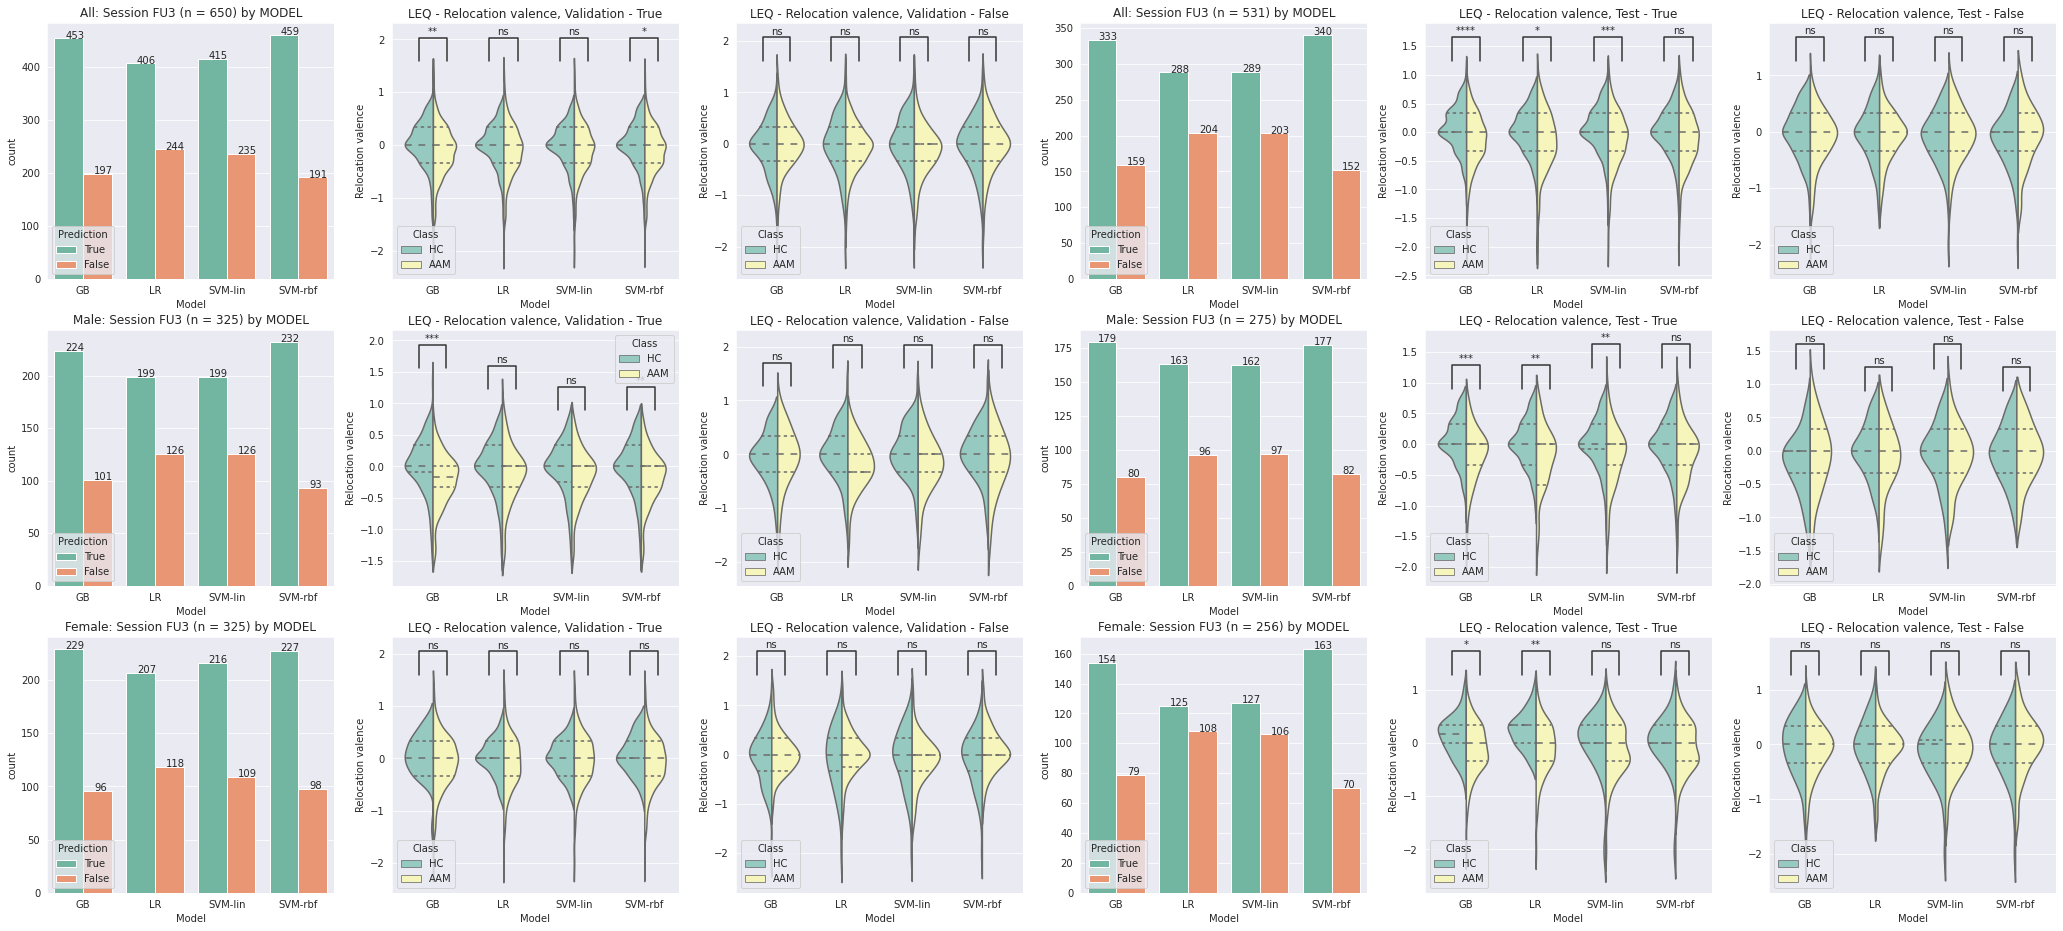

In [19]:
# Plot the result by Model prediction
ses_data = ph_LEQ
# groupby Session
ses = ses_data.groupby('Session')
b_FU3 = ses.get_group('FU3')
train = b_FU3
# Plot the result by Model prediction
ses_data = tt_LEQ
# groupby Session
ses = ses_data.groupby('Session')
b_FU3 = ses.get_group('FU3')
test = b_FU3
# Accident
col = ph_LEQ.columns[1]
LEQ_ML_result = ml_TF_plot('LEQ', train, test, col)
# Sexuality
col = ph_LEQ.columns[2]
LEQ_ML_result = ml_TF_plot('LEQ', train, test, col)
# Relocation
col = ph_LEQ.columns[5]
LEQ_ML_result = ml_TF_plot('LEQ', train, test, col)

### 3.2.5. CTS

In [20]:
# Select the session: BL
c_CTS = b_CTS.columns[:5]

<b> Plot the result by Sex & Class </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=6.123e-01 stat=-5.071e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=7.025e-01 stat=3.822e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=4.131e-02 stat=-2.045e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with 

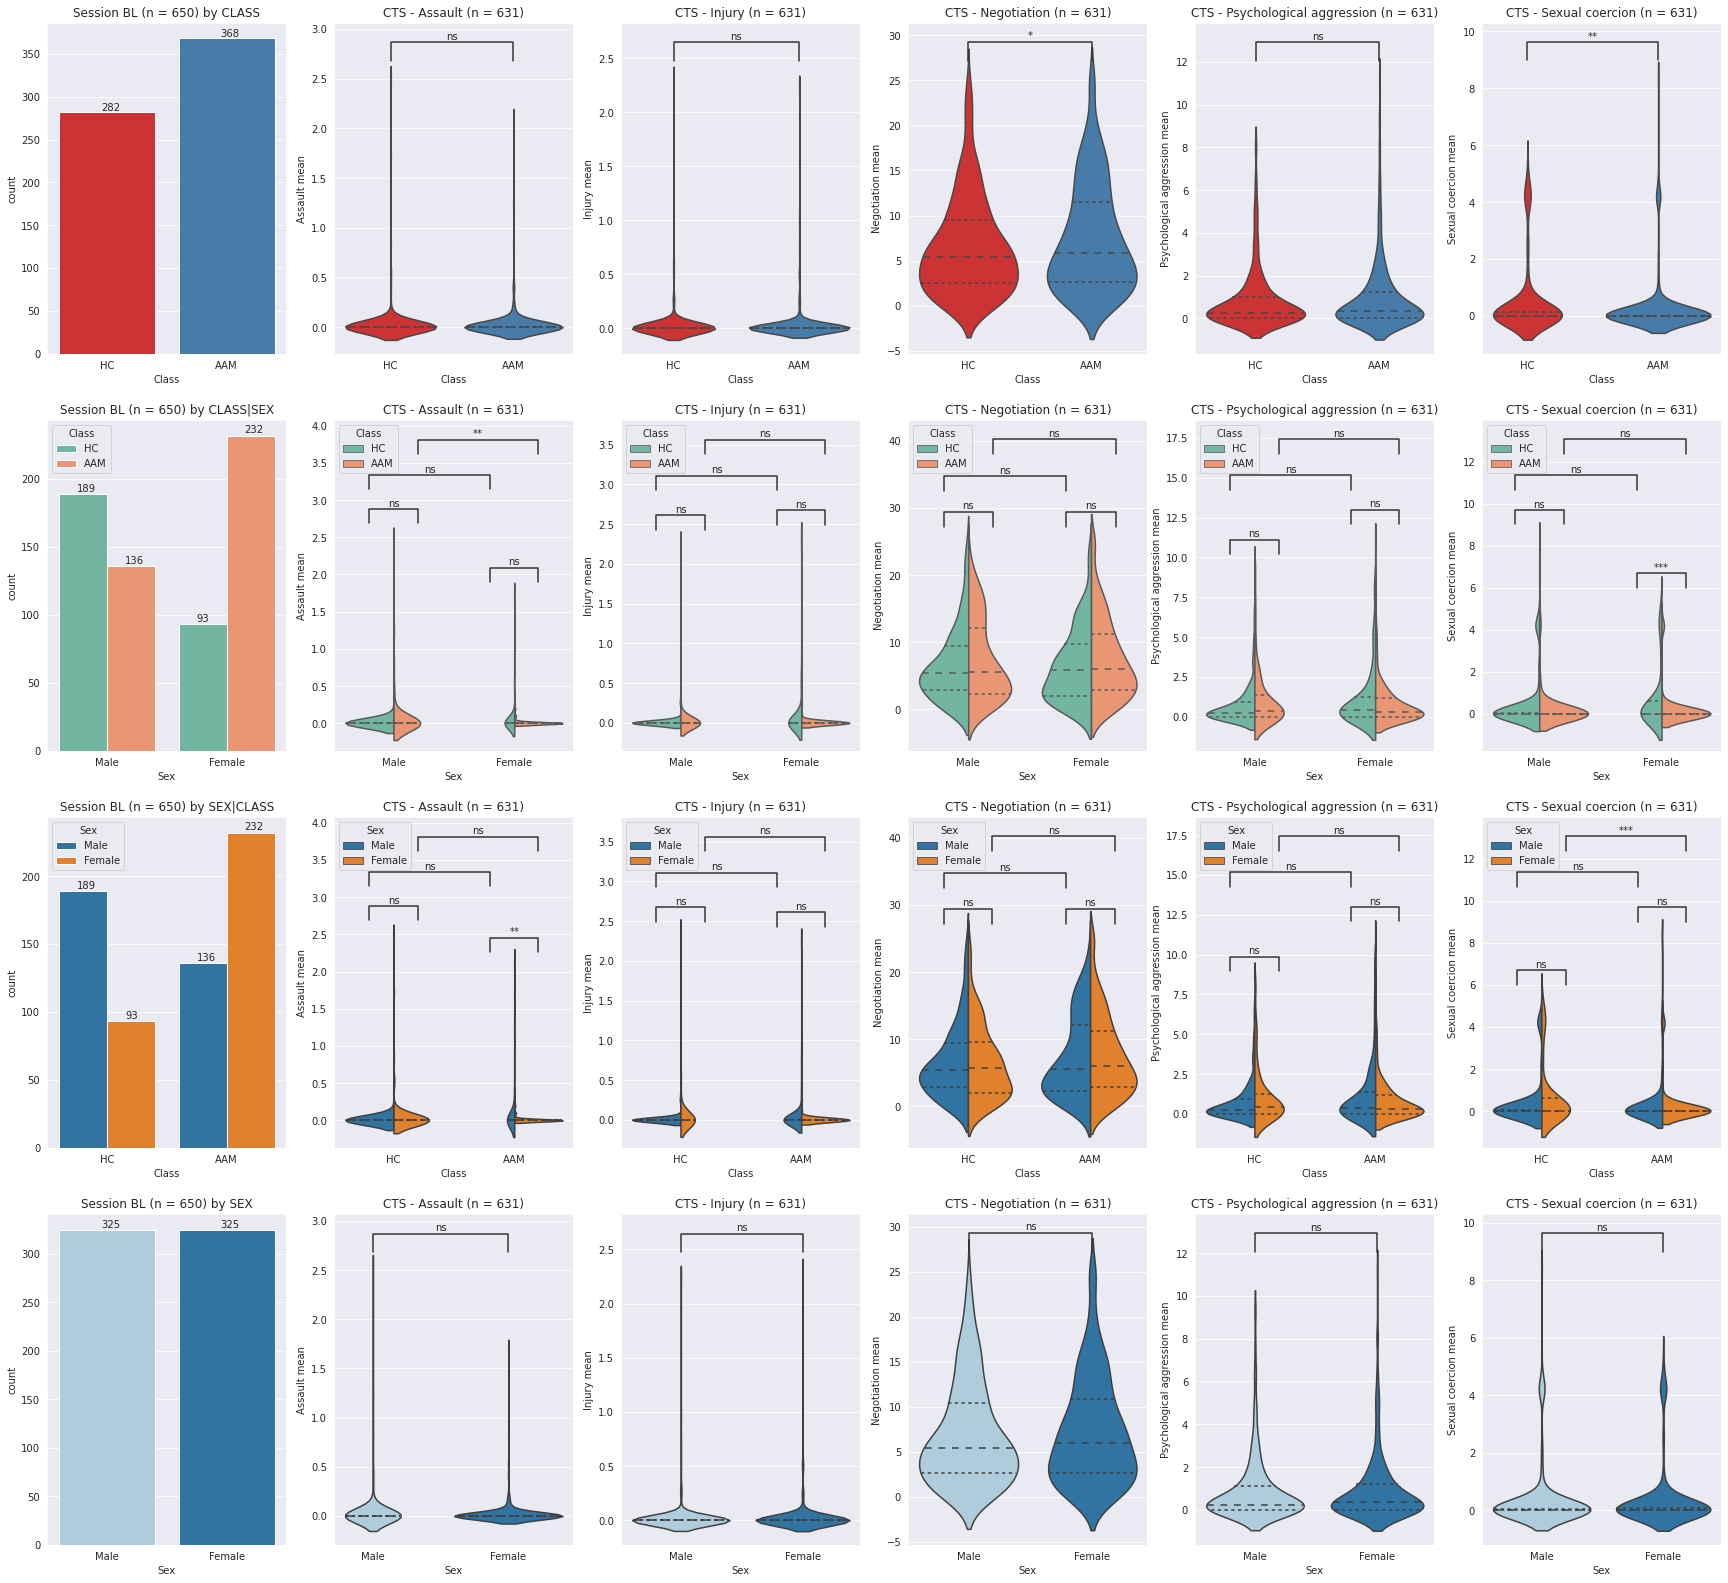

In [21]:
# Plot the result by Sex & Class
data = b_CTS
col = c_CTS
CTS_result = sc_plot('CTS', data, col)

In [22]:
# # Plot the result by Sex & Class
# data = tt_CTS
# col = c_CTS
# CTS_result = sc_plot('CTS', data, col)

<b> Plot the result by Model prediction </b>

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. ('X', 'Binge', 'cb', 'LR')_AAM: t-test independent samples with Bonferroni correction, P_val=4.564e-01 stat=-1.584e+00
('X', 'Binge', 'cb', 'GB')_HC v.s. ('X', 'Binge', 'cb', 'GB')_AAM: t-test independent samples with Bonferroni correction, P_val=4.337e-01 stat=-1.609e+00
('X', 'Binge', 'cb', 'SVM-lin')_HC v.s. ('X', 'Binge', 'cb', 'SVM-lin')_AAM: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-4.609e-01
('X', 'Binge', 'cb', 'SVM-rbf')_HC v.s. ('X', 'Binge', 'cb', 'SVM-rbf')_AAM: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.118e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

('X', 'Binge', 'cb', 'LR')_HC v.s. (

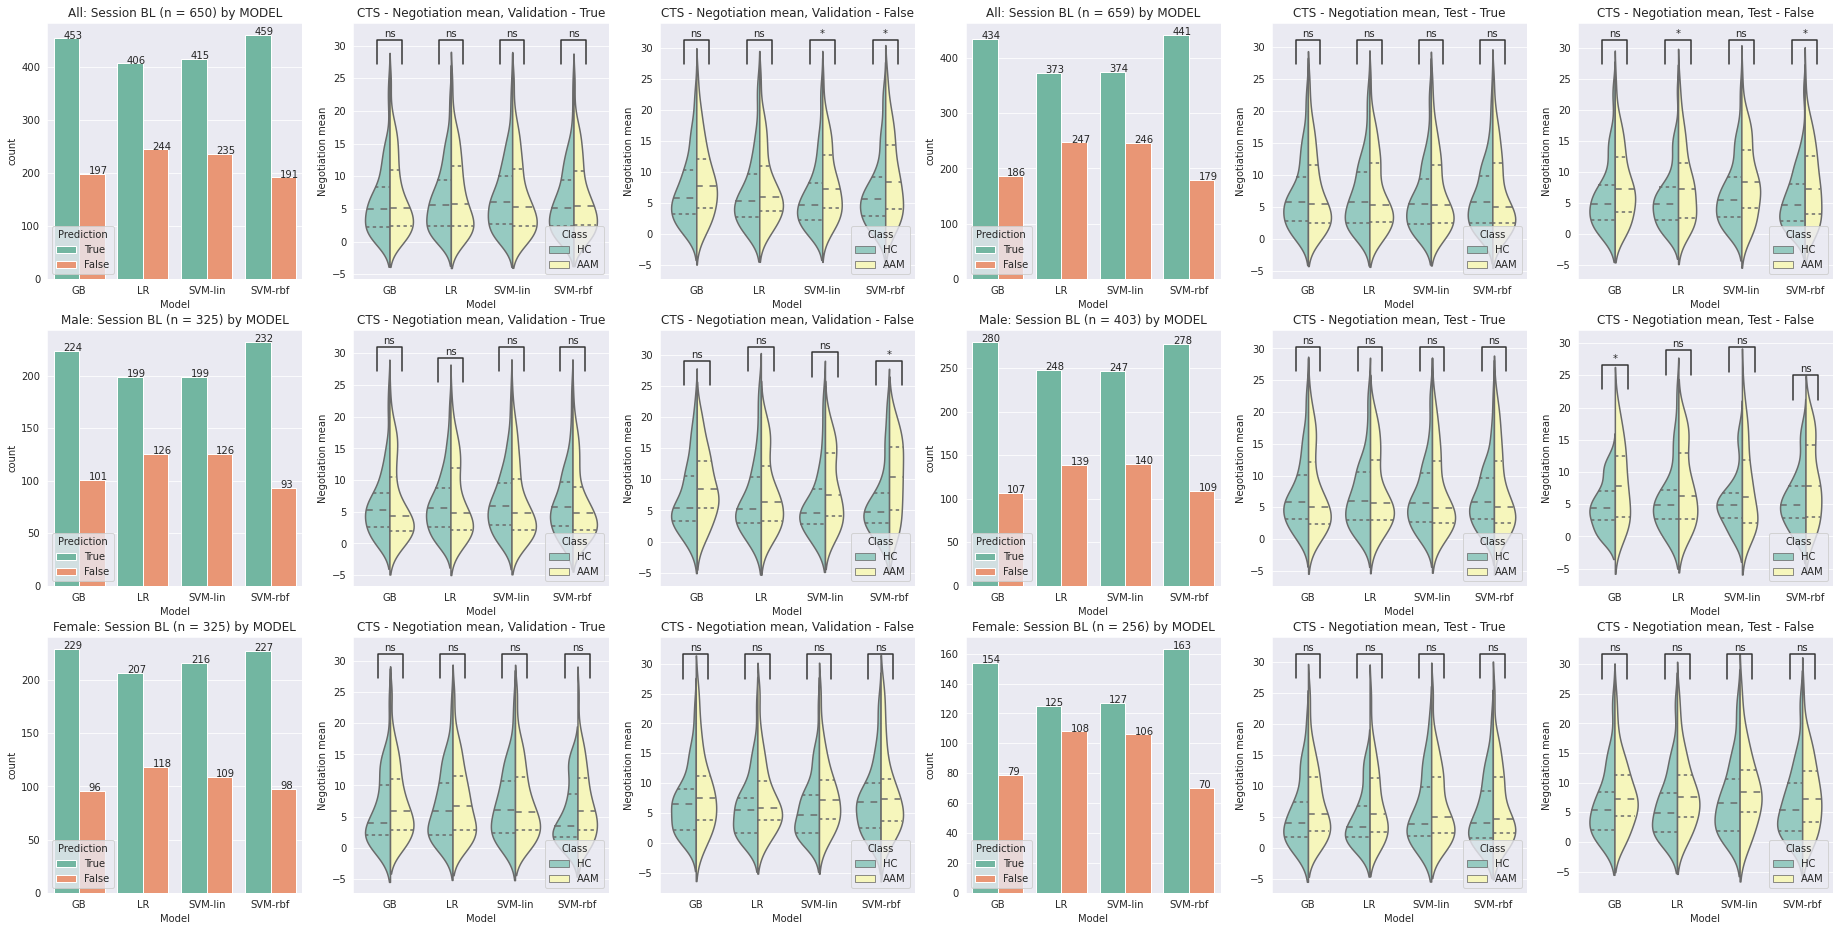

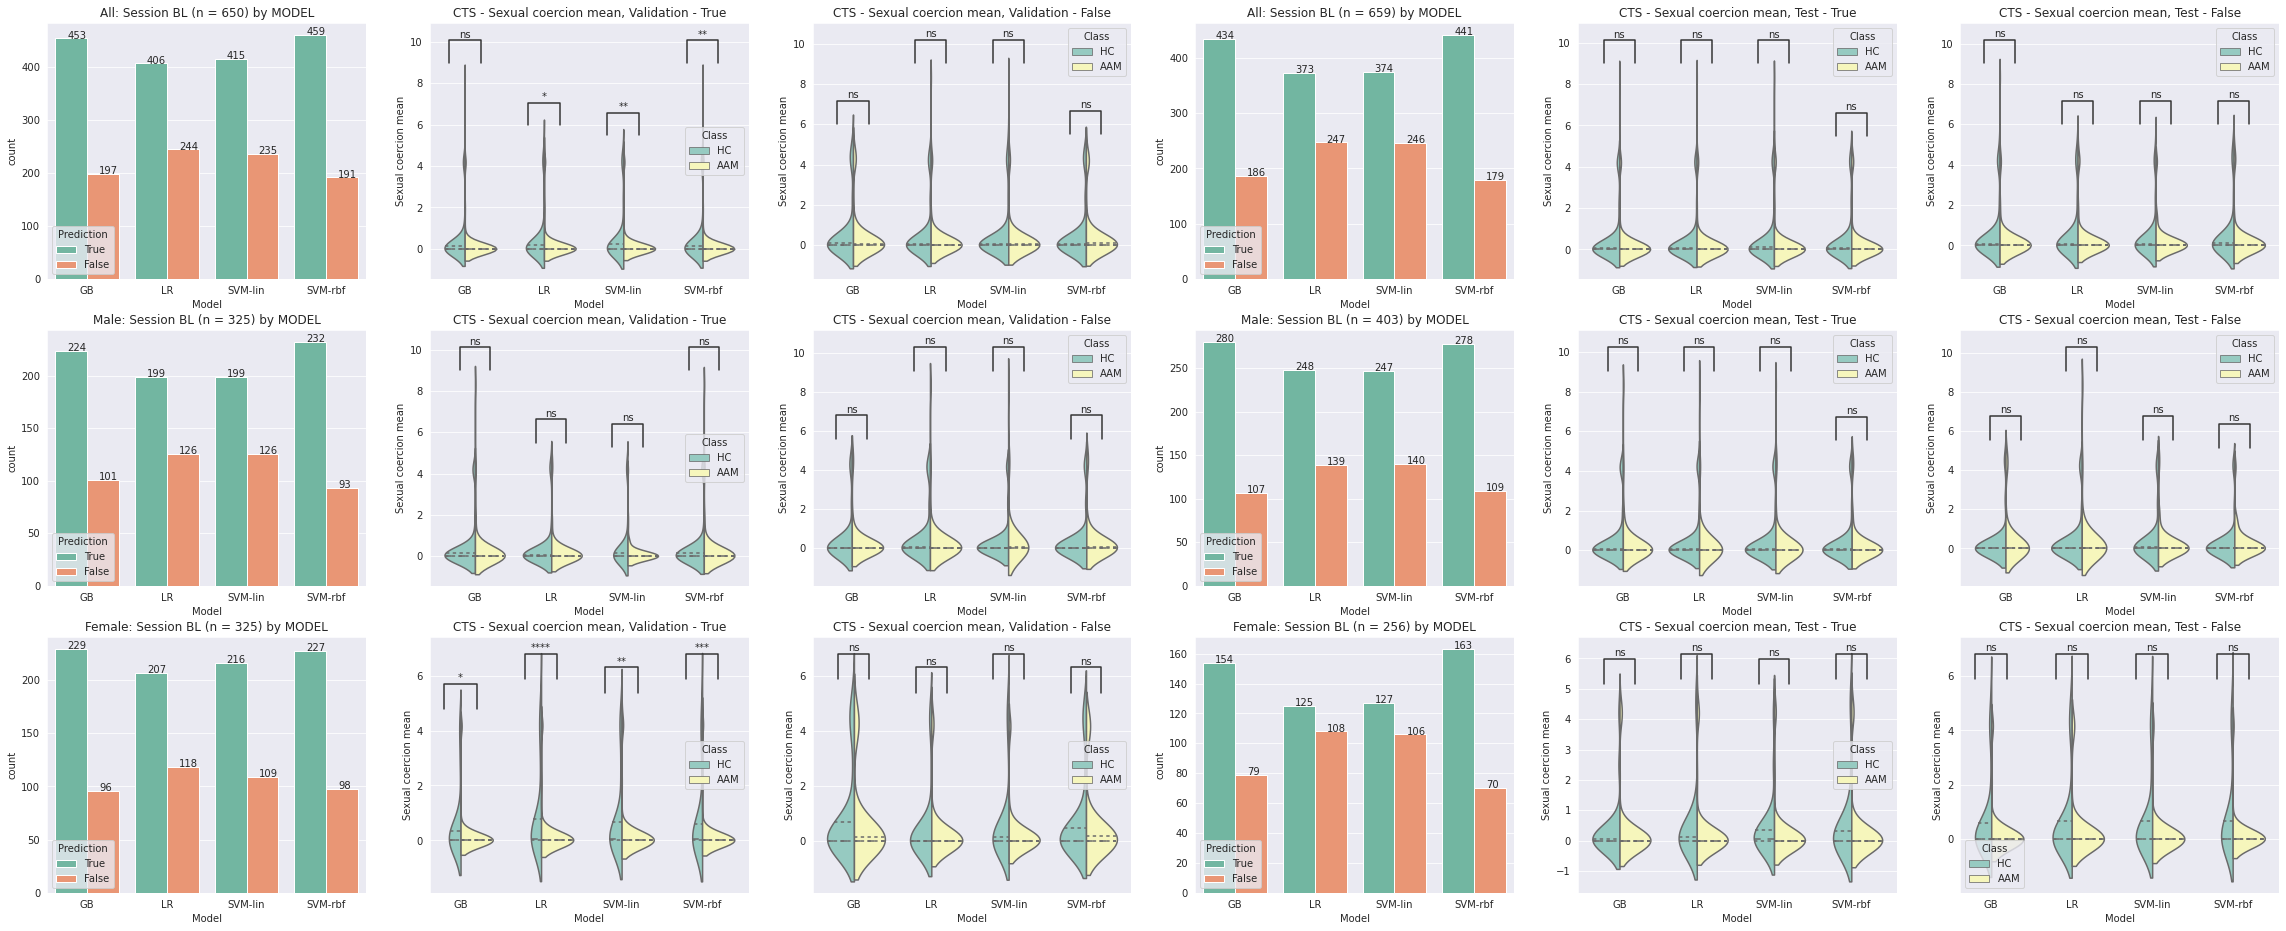

In [23]:
# Plot the result by Model prediction
train = ph_CTS
test = tt_CTS
# Negotiation
col = ph_CTS.columns[2]
CTS_ML_result = ml_TF_plot('CTS', train, test, col)
# Sexual coersion
col = ph_CTS.columns[4]
CTS_ML_result = ml_TF_plot('CTS', train, test, col)
# CTS_ML_result = ml_plot('CTS', data[data[col]<0.5], col)

## 3.3. Prognosis: posthoc analysis on newlbls-fu3-espad-fu3-19a-binge-n650

### Other Session (BL, FU1, FU2)

In [24]:
# # Model
# binge_ML = DF.groupby('Model')
# # Logistic Regression (LR)
# binge_ML_LR = binge_ML.get_group("('X', 'Binge', 'cb', 'LR')")
# LR_T = binge_ML_LR[binge_ML_LR['Predict']==True]['ID'].values.tolist()
# LR_F = binge_ML_LR[binge_ML_LR['Predict']!=True]['ID'].values.tolist()
# # Linear SVM (SVM-lin)
# binge_ML_SVM_lin = binge_ML.get_group("('X', 'Binge', 'cb', 'SVM-lin')")
# SVM_lin_T = binge_ML_SVM_lin[binge_ML_SVM_lin['Predict']==True]['ID'].values.tolist()
# SVM_lin_F = binge_ML_SVM_lin[binge_ML_SVM_lin['Predict']!=True]['ID'].values.tolist()
# # Kernal SVM (SVM-rbf)
# binge_ML_SVM_rbf = binge_ML.get_group("('X', 'Binge', 'cb', 'SVM-rbf')")
# SVM_rbf_T = binge_ML_SVM_rbf[binge_ML_SVM_rbf['Predict']==True]['ID'].values.tolist()
# SVM_rbf_F = binge_ML_SVM_rbf[binge_ML_SVM_rbf['Predict']!=True]['ID'].values.tolist()
# # Gradient Boosting (GB)
# binge_ML_GB = binge_ML.get_group("('X', 'Binge', 'cb', 'GB')")
# GB_T = binge_ML_GB[binge_ML_GB['Predict']==True]['ID'].values.tolist()
# GB_F = binge_ML_GB[binge_ML_GB['Predict']!=True]['ID'].values.tolist()

In [25]:
# binge_CTQ_Sex = binge_CTQ.groupby(['Sex'])
# binge_CTQ_M = binge_CTQ_Sex.get_group('Male')
# binge_CTQ_F = binge_CTQ_Sex.get_group('Female')

In [26]:
# binge_CTQ_Sex = binge_CTQ.groupby(['Sex'])
# binge_CTQ_M = binge_CTQ_Sex.get_group('Male')
# binge_CTQ_F = binge_CTQ_Sex.get_group('Female')
# binge_CTQ_GB_T = binge_CTQ.set_index('ID').loc[GB_T]
# binge_CTQ_GB_T_M = binge_CTQ.set_index('ID').loc[GB_T].groupby(['Sex']).get_group('Male')
# binge_CTQ_GB_T_F = binge_CTQ.set_index('ID').loc[GB_T].groupby(['Sex']).get_group('Female')
# binge_CTQ_GB_F = binge_CTQ.set_index('ID').loc[GB_F]
# binge_CTQ_GB_F_M = binge_CTQ.set_index('ID').loc[GB_F].groupby(['Sex']).get_group('Male')
# binge_CTQ_GB_F_F = binge_CTQ.set_index('ID').loc[GB_F].groupby(['Sex']).get_group('Female')

# ('LR T',binge_CTQ.set_index('ID').loc[LR_T]), ('LR F',binge_CTQ.set_index('ID').loc[LR_F]),
# ('SVM lin T',binge_CTQ.set_index('ID').loc[SVM_lin_T]), ('SVM lin F',binge_CTQ.set_index('ID').loc[SVM_lin_F]),
# ('SVM rbf T',binge_CTQ.set_index('ID').loc[SVM_rbf_T]), ('SVM rbf F',binge_CTQ.set_index('ID').loc[SVM_rbf_F])

In [27]:
# g = sns.catplot(ax = axes[1], x='Model', y='Denial sum',
#                 hue="Class", col="Sex", inner="quartile",
#                 data=DF_I, kind="violin", split=True, palette="Set2",
#                 height=6, aspect=1);

# (g.set_axis_labels("", "Denial sum")
#   .set_xticklabels(["GB", "LR", "SVM-lin", "SVM-rbf"])
#   .set_titles("{col_name} {col_var}")
#   .despine(left=True))

In [28]:
# for (S, DF2) in [('All', binge_CTQ),
#                 ('True GB', binge_CTQ.set_index('ID').loc[GB_T, :]),
#                 ('False GB', binge_CTQ.set_index('ID').loc[GB_F, :]),
#                 ('True LR', binge_CTQ.set_index('ID').loc[LR_T, :]),
#                 ('False LR', binge_CTQ.set_index('ID').loc[LR_F, :]),
#                 ('True SVM lin', binge_CTQ.set_index('ID').loc[SVM_lin_T, :]),
#                 ('False SVM lin', binge_CTQ.set_index('ID').loc[SVM_lin_F, :]),
#                 ('True SVM rbf', binge_CTQ.set_index('ID').loc[SVM_rbf_T, :]),
#                 ('False SVM rbf', binge_CTQ.set_index('ID').loc[SVM_rbf_F, :])]:
#     columns = DF2.columns[:6]
#     sns.set(style="whitegrid", font_scale=1.5)
    
#     fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
#                              figsize=(24*len(columns), 12*1))
#     sns.countplot(x="Sex", hue='Class', order=['Male', 'Female'], data = DF2,
#                   ax = axes[0], palette="Set2").set(title=S)
    
#     for i, j in enumerate(columns):
#         axes[i+1].set_title(columns[i])
#         sns.violinplot(x="Sex", y=j, data=DF2, order=['Male', 'Female'],
#                        hue='Class', palette="Set2", split=True, 
#                        inner="quartile", ax = axes[i+1])
#         add_stat_annotation(ax = axes[i+1], data=DF2, x="Class", y=j,
#                             box_pairs = [("HC","AAM")], order=["HC","AAM"],
#                             test='t-test_ind', text_format='star', loc='inside') 

In [29]:
# for (S, DF2) in [('All', binge_SURPS),
#                 ('True GB', binge_SURPS.set_index('ID').loc[GB_T, :]),
#                 ('False GB', binge_SURPS.set_index('ID').loc[GB_F, :]),
#                 ('True LR', binge_SURPS.set_index('ID').loc[LR_T, :]),
#                 ('False LR', binge_SURPS.set_index('ID').loc[LR_F, :]),
#                 ('True SVM lin', binge_SURPS.set_index('ID').loc[SVM_lin_T, :]),
#                 ('False SVM lin', binge_SURPS.set_index('ID').loc[SVM_lin_F, :]),
#                 ('True SVM rbf', binge_SURPS.set_index('ID').loc[SVM_rbf_T, :]),
#                 ('False SVM rbf', binge_SURPS.set_index('ID').loc[SVM_rbf_F, :])]:
#     columns = DF2.columns[:4]
    
#     sns.set(style="whitegrid", font_scale=1.5)
#     fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
#                              figsize=((len(columns)+1)**2, len(columns)+1))
#     sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF2,
#                   ax = axes[0], palette="Set2").set(title=S)
    
#     for i, j in enumerate(columns):
#         axes[i+1].set_title(columns[i])
#         sns.violinplot(x="Class", y=j, data=DF2, order=['HC', 'AAM'],
#                        inner="quartile", ax = axes[i+1], palette="Set1")
#         add_stat_annotation(ax = axes[i+1], data=DF2, x="Class", y=j,
#                             box_pairs = [("HC","AAM")], order=["HC","AAM"],
#                             test='t-test_ind', text_format='star', loc='inside') 